<a href="https://colab.research.google.com/github/bcastiblancoo/Experimental-High-Energy-Physics---Subject/blob/main/JetsHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion python2.7
!gdown https://drive.google.com/uc?id=1bWgcTAMG7IoyQASWwrrOQrGe4haUAo9t
!cd /; tar xzf /content/root_for_colab.tar.gz
!rm -rf root_for_colab.tar.gz
import sys
sys.path.append("/content/root/build/")
sys.path.append("/content/root/build/bin/")
sys.path.append("/content/root/build/include/")
sys.path.append("/content/root/build/lib/")
import ROOT

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
dpkg-dev set to manually installed.
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.9).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.4).
libx11-dev set to manually installed.
python2.7 is already the newest version (2.7.17-1~18.04ubuntu1.6).
python2.7 set to manually installed.
The following additional packages will be installed:
  binutils-common binutils-x86-64-linux-gnu libap

At first we have to include several helpers that will support our analysis:

Next we have to open the data that we want to analyze. As described above the data is stored in a *.root file. This is a root file containing tracks and calorimeter clusters

In [3]:
F = ROOT.TFile.Open("https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root")

After the data is opened we create a canvas on which we can draw a histogram. If we do not have a canvas we cannot see our histogram at the end. Its name is "Canvas" and its header is "Jets".

In [45]:
canvas = ROOT.TCanvas("Canvas","a first way to plot a variable",800,600)

The next step is to define a tree named tree to get the data out of the *.root file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables.

In [4]:
tree = F.Get("JetRecoTree")
tree.Print()
tree.GetEntries()

102900

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

Create histograms: Leading jet pT and all jets pT:

In [5]:
hist_leadreco_pt = ROOT.TH1F("Lead Reco-Jet","Leading jet pT; pT(GeV);Events",50,10,200)
hist_reco_pt = ROOT.TH1F("Reco-Jet","Jet pT; pT(GeV);Events",50,10,200)

Loop and fill histograms

In [6]:
for event in tree:
    if tree.RecoJets_R4_pt.size()>0:
      hist_leadreco_pt.Fill(tree.RecoJets_R4_pt.at(0)/1000,tree.EventWeight)
    for tr in range(tree.RecoJets_R4_pt.size()):
         hist_reco_pt.Fill(tree.RecoJets_R4_pt.at(tr)/1000,tree.EventWeight)
    
print("Done!")

Done!


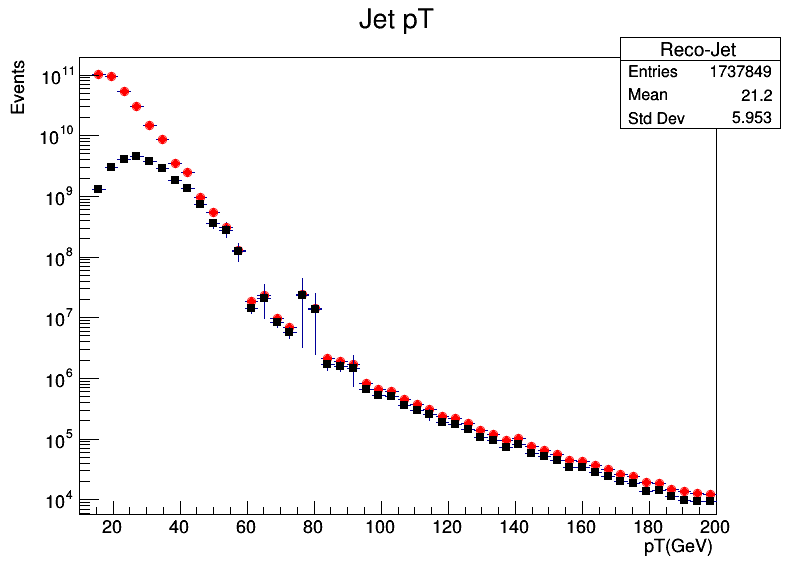

In [7]:
hist_reco_pt.SetMarkerStyle(20);
hist_reco_pt.SetMarkerColor(2);
hist_reco_pt.Draw("");
hist_leadreco_pt.SetMarkerStyle(21);
hist_leadreco_pt.SetMarkerColor(1);
hist_leadreco_pt.Draw("same");
canvas.SetLogy();
canvas.Draw();

**Excercise 1. Compare the leading truth jet pT with the leading reco jet pT, with and without event weights.**

**Solution 1:**

*   Comparing reconstructed JETS with the *Anti*-$K_{t}$-algorithm with R=0.4:

1.   Leading and all truth jets pT (reconstructed from particles) with the leading and all reco jets pT (reconstructed from clusters) **with** event weights:







In [8]:
#First it is necessary to create a histogram for leading and all truth jets pT and fill it:
hist_leadtruthjet_pt=ROOT.TH1F("leadtruthjet_pt","Leading truth jet pT; pT(GeV); Events",50,10,200)
hist_truthjets_pt=ROOT.TH1F("truthjets_pt","Truth Jets pT; pT(GeV; Events",50,10,200)

In [9]:
for event in tree:
  if tree.TruthJets_R4_pt.size()>0:
    hist_leadtruthjet_pt.Fill(tree.TruthJets_R4_pt.at(0)/1000,tree.EventWeight)
    for tr in range(tree.TruthJets_R4_pt.size()):
      hist_truthjets_pt.Fill(tree.TruthJets_R4_pt.at(tr)/1000,tree.EventWeight)

print("Done.")  

Done.


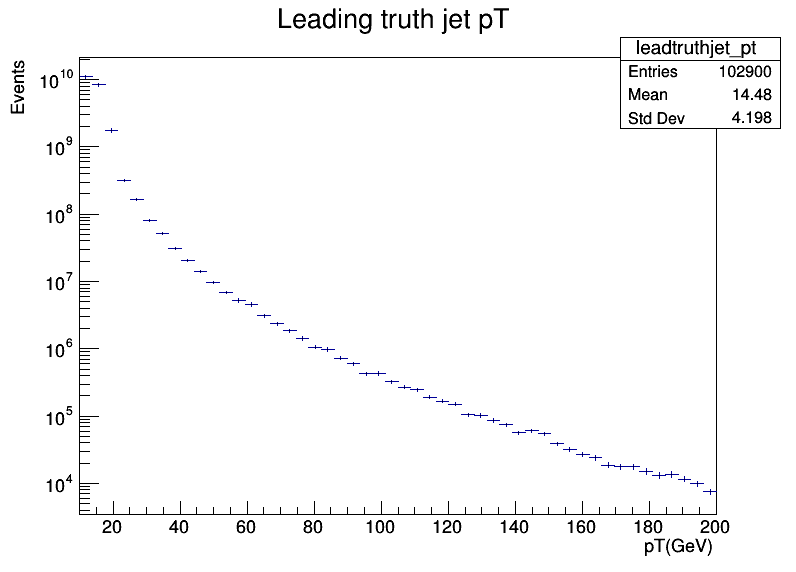

In [10]:
hist_leadtruthjet_pt.Draw()
canvas.Draw()

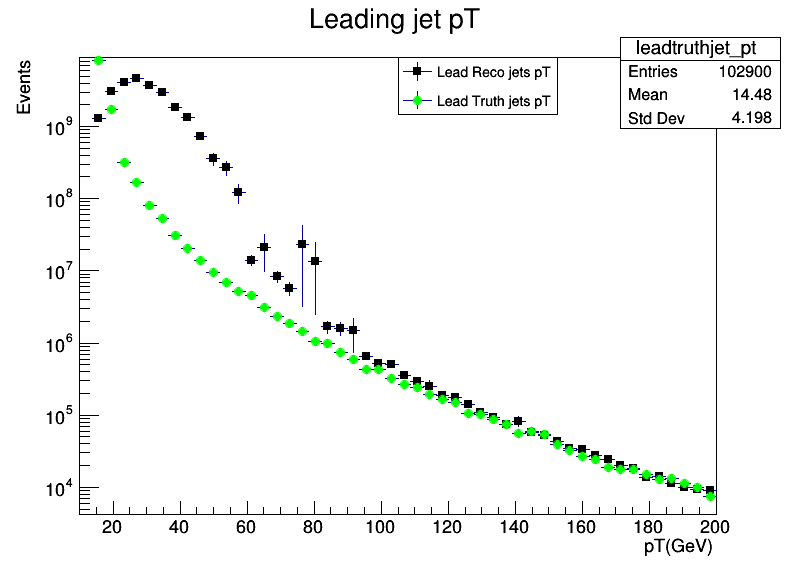

In [11]:
#Compairing lead reco jets and lead truth jets in the same graph:
hist_leadreco_pt.SetMarkerStyle(21);
hist_leadreco_pt.SetMarkerColor(1);
hist_leadreco_pt.Draw("");
hist_leadtruthjet_pt.SetMarkerStyle(20);
hist_leadtruthjet_pt.SetMarkerColor(3);
hist_leadtruthjet_pt.Draw("same");
legendrt=ROOT.TLegend(0.5,0.8,0.7,0.9);
legendrt.AddEntry(hist_leadreco_pt,"Lead Reco jets pT","lep");
legendrt.AddEntry(hist_leadtruthjet_pt,"Lead Truth jets pT","lep");
legendrt.Draw();
canvas.SetLogy();
canvas.Draw();
#canvas.Print("LeadingTruthVSRecoR4.png");

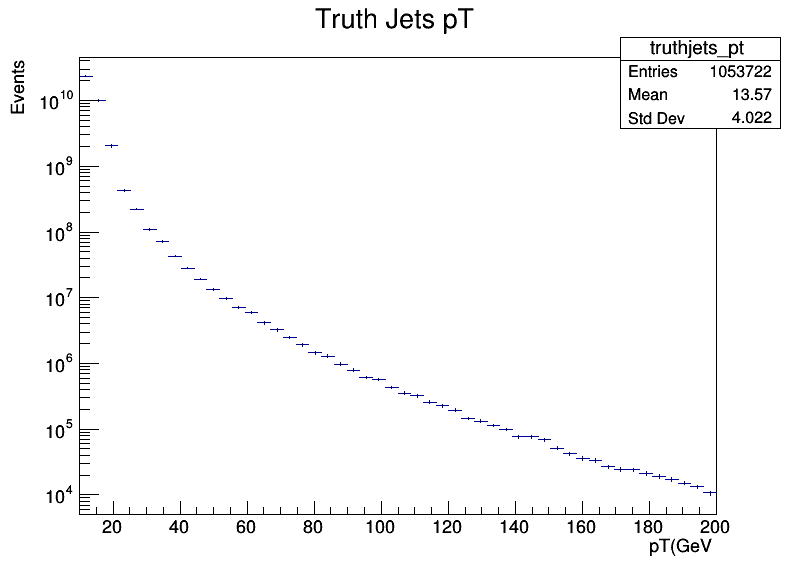

In [12]:
#Ploting all other truth jets
hist_truthjets_pt.Draw()
canvas.Draw()

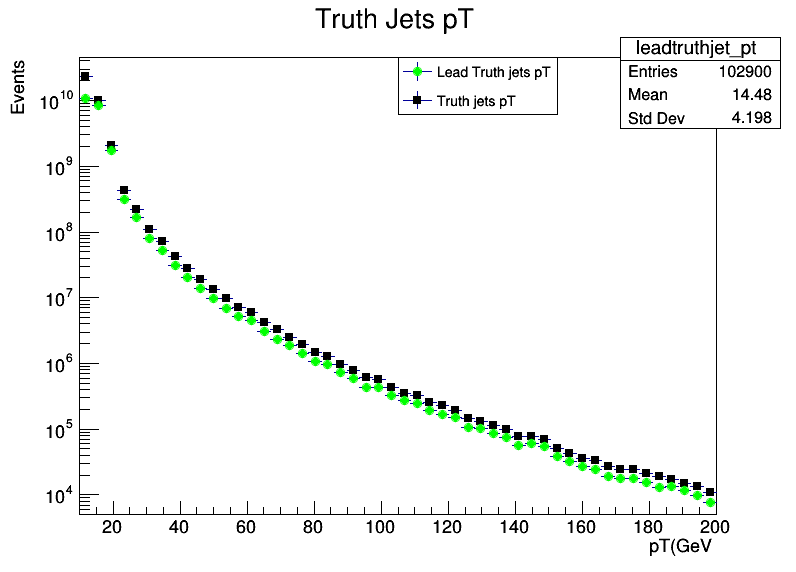

In [13]:
#Compairing lead and truth jets:
hist_truthjets_pt.SetMarkerStyle(21);
hist_truthjets_pt.SetMarkerColor(1);
hist_truthjets_pt.Draw("");
hist_leadtruthjet_pt.SetMarkerStyle(20);
hist_leadtruthjet_pt.SetMarkerColor(3);
hist_leadtruthjet_pt.Draw("same");
legendtruth=ROOT.TLegend(0.5,0.8,0.7,0.9);
legendtruth.AddEntry(hist_leadtruthjet_pt,"Lead Truth jets pT","lep");
legendtruth.AddEntry(hist_truthjets_pt,"Truth jets pT","lep");
legendtruth.Draw();
canvas.SetLogy();
canvas.Draw();
#canvas.Print("LeadAndTruthJetsR4.png");

2. Compairing leading truth jet pT with the leading reco jet pT **withouth** (wow) event weights:



In [14]:
#Create new histograms because the code can get confused because of memory
#For leading reco jet:
hist_leadrecowow_pt=ROOT.TH1F("Lead Reco-Jet wow","Leading jet pT without event weights; pT(GeV);Events",50,10,200)
hist_recowow_pt=ROOT.TH1F("Reco-Jet wow","Reco jets pT without event weights; pT(GeV);Events",50,10,200)
hist_leadtruthwow_pt=ROOT.TH1F("Lead Truth-Jet wow", "Leading jet pT without event weights; pT(GeV);Events",50,10,200)
hist_truthwow_pt=ROOT.TH1F("Truth-Jet wow","Truth jets pT without event weights; pT(GeV);Events",50,10,200)

In [15]:
#Filling the histograms for Reco Jets without event weights
for event in tree:
  if tree.RecoJets_R4_pt.size()>0:
    hist_leadrecowow_pt.Fill(tree.RecoJets_R4_pt.at(0)/1000)
    for tr in range(tree.RecoJets_R4_pt.size()):
      hist_recowow_pt.Fill(tree.RecoJets_R4_pt.at(tr)/1000)
print("Done.")

Done.


In [16]:
#For Truth jets without events:
for event in tree:
  if tree.TruthJets_R4_pt.size()>0:
    hist_leadtruthwow_pt.Fill(tree.TruthJets_R4_pt.at(0)/1000)
    for tr in range(tree.TruthJets_R4_pt.size()):
      hist_truthwow_pt.Fill(tree.TruthJets_R4_pt.at(tr)/1000)
print("Done.")      


Done.


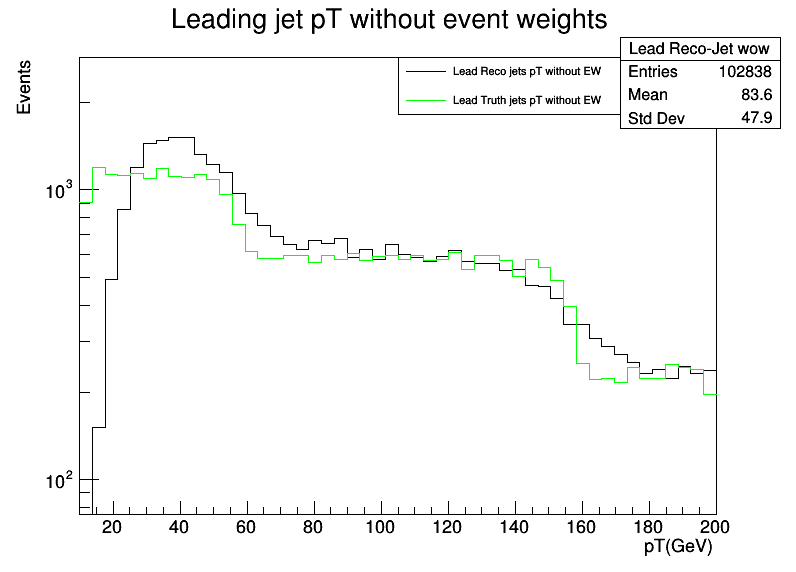

In [17]:
#Ploting leading jets without weight event together:
hist_leadrecowow_pt.SetLineColor(1);
hist_leadrecowow_pt.Draw("");
hist_leadtruthwow_pt.SetLineColor(3);
hist_leadtruthwow_pt.Draw("same");
legendrtwow=ROOT.TLegend(0.5,0.8,0.78,0.9);
legendrtwow.AddEntry(hist_leadrecowow_pt,"Lead Reco jets pT without EW","l");
legendrtwow.AddEntry(hist_leadtruthwow_pt,"Lead Truth jets pT without EW","l");
legendrtwow.Draw();
canvas.SetLogy();
canvas.Draw();
#canvas.Print("LeadingTruthVSRecoR4wow.png");

**Exercise 2: Repeat for all jets pT.**

**Solution 2:**

Let's compare leading jets pT with their corresponding jets, with and without eventweight.

*   Within reconstructed jets in the Anti- Kt -algorithm with R=0.4, there's one remaining: **Track Jets pT**




1.   Compairing leading track jets pT with just the track jets pT **with** event weights:



In [18]:
#Create both histograms and fill them:
hist_leadtrackjets_pt=ROOT.TH1F("leadtrackjets_pt","Leading Track jets pT; pT(GeV); Events",50,10,200)
hist_trackjets_pt=ROOT.TH1F("trackjets_pt","Track Jets pT; pT(GeV; Events",50,10,200)

In [19]:
for event in tree:
  if tree.TrackJets_R4_pt.size()>0:
    hist_leadtrackjets_pt.Fill(tree.TrackJets_R4_pt.at(0)/1000,tree.EventWeight)
    for tr in range(tree.TrackJets_R4_pt.size()):
      hist_trackjets_pt.Fill(tree.TrackJets_R4_pt.at(tr)/1000,tree.EventWeight)

print("Done.")

Done.


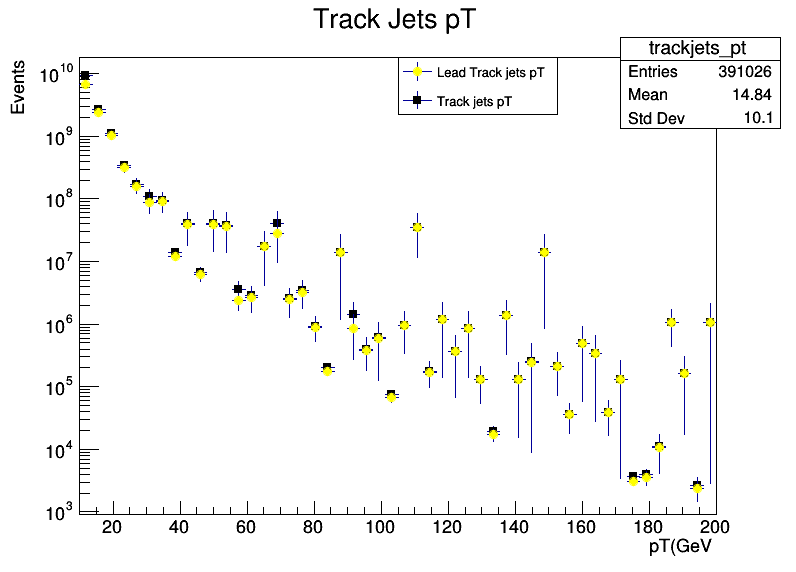

In [20]:
#Ploting them together:
hist_trackjets_pt.SetMarkerStyle(21);
hist_trackjets_pt.SetMarkerColor(1);
hist_trackjets_pt.Draw("");
hist_leadtrackjets_pt.SetMarkerStyle(20);
hist_leadtrackjets_pt.SetMarkerColor(5);
hist_leadtrackjets_pt.Draw("same");
legendtracks=ROOT.TLegend(0.5,0.8,0.7,0.9);
legendtracks.AddEntry(hist_leadtrackjets_pt,"Lead Track jets pT","lep");
legendtracks.AddEntry(hist_trackjets_pt,"Track jets pT","lep");
legendtracks.Draw();
canvas.SetLogy();
canvas.Draw();
#canvas.Print("LeadingTracksVSTracksR4.png");

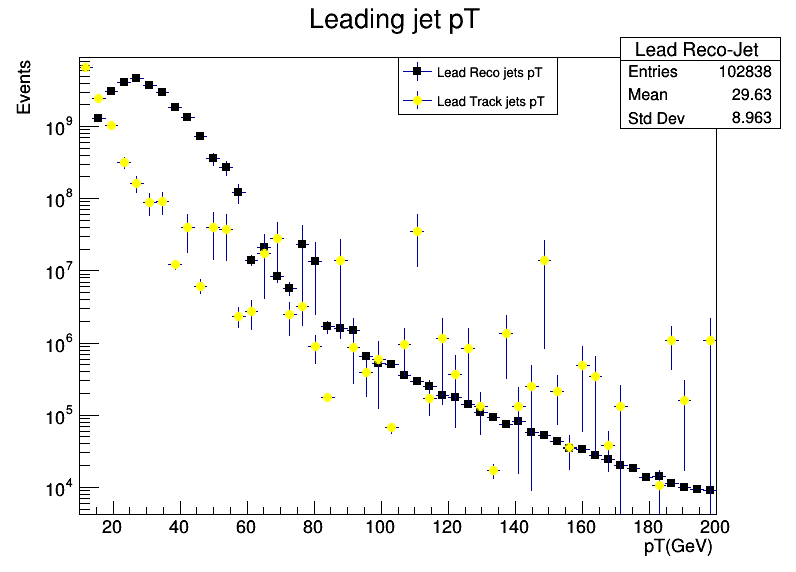

In [21]:
#Compairing lead Track jets pT with Reco jets pT:
hist_leadreco_pt.SetMarkerStyle(21);
hist_leadreco_pt.SetMarkerColor(1);
hist_leadreco_pt.Draw("");
hist_leadtrackjets_pt.SetMarkerStyle(20);
hist_leadtrackjets_pt.SetMarkerColor(5);
hist_leadtrackjets_pt.Draw("same");
legendrecotrack=ROOT.TLegend(0.5,0.8,0.7,0.9);
legendrecotrack.AddEntry(hist_leadreco_pt,"Lead Reco jets pT","lep");
legendrecotrack.AddEntry(hist_leadtrackjets_pt,"Lead Track jets pT","lep");
legendrecotrack.Draw();
canvas.SetLogy();
canvas.Draw();
#canvas.Print("LeadingTracksVSLeadingRecoR4.png");

2.   Compairing leading track jets pT with just the track jets pT **without** event weights:



In [22]:
#Create new histograms and fill them:
hist_leadtrackjetswow_pt=ROOT.TH1F("leadtrackjets_ptwow","Leading Track jets pT without EW; pT(GeV); Events",50,10,200)
hist_trackjetswow_pt=ROOT.TH1F("trackjets_ptwow","Track Jets pT without EW; pT(GeV; Events",50,10,200)

In [23]:
for event in tree:
  if tree.TrackJets_R4_pt.size()>0:
    hist_leadtrackjetswow_pt.Fill(tree.TrackJets_R4_pt.at(0)/1000)
    for tr in range(tree.TrackJets_R4_pt.size()):
      hist_trackjetswow_pt.Fill(tree.TrackJets_R4_pt.at(tr)/1000)

print("Done.")

Done.


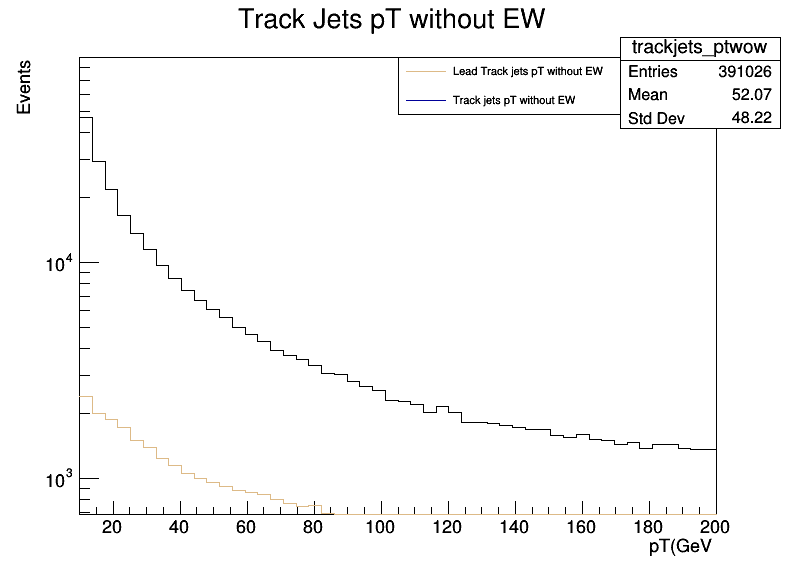

In [24]:
#Ploting them together:
hist_trackjetswow_pt.SetLineColor(1);
hist_trackjetswow_pt.Draw("");
hist_leadtrackjetswow_pt.SetLineColor(42);
hist_leadtrackjetswow_pt.Draw("same");
legendtrackswow=ROOT.TLegend(0.5,0.8,0.78,0.9);
legendtrackswow.AddEntry(hist_leadtrackjetswow_pt,"Lead Track jets pT without EW","l");
legendtrackswow.AddEntry(hist_trackjets_pt,"Track jets pT without EW","l");
legendtrackswow.Draw();
canvas.SetLogy();
canvas.Draw();
#canvas.Print("LeadingTracksVSTracksR4wow.png");

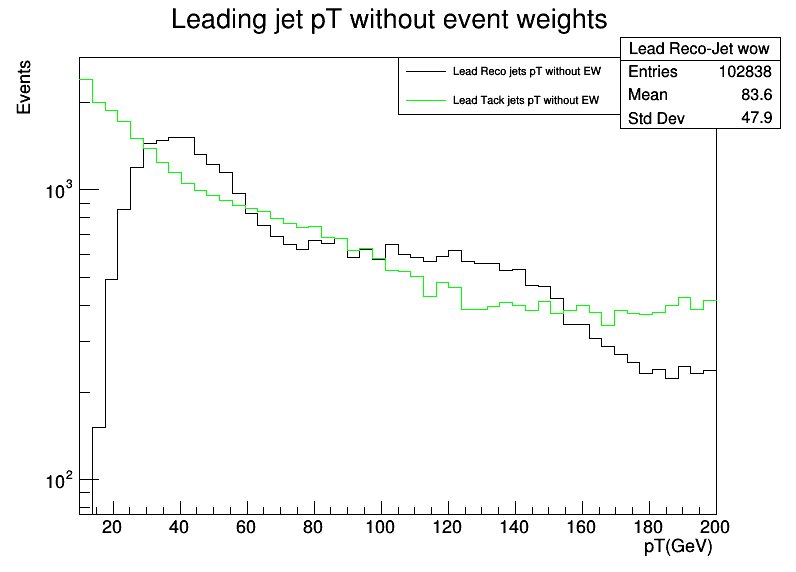

In [25]:
#Compairing Leading Track jets pT with Leading Reco jets without EW:
hist_leadrecowow_pt.SetLineColor(1);
hist_leadrecowow_pt.Draw("");
hist_leadtrackjetswow_pt.SetLineColor(3);
hist_leadtrackjetswow_pt.Draw("same");
legendrtrackwow=ROOT.TLegend(0.5,0.8,0.78,0.9);
legendrtrackwow.AddEntry(hist_leadrecowow_pt,"Lead Reco jets pT without EW","l");
legendrtrackwow.AddEntry(hist_leadtrackjetswow_pt,"Lead Tack jets pT without EW","l");
legendrtrackwow.Draw();
canvas.SetLogy();
canvas.Draw();
#canvas.Print("LeadingTrackVSLeadingRecoR4wow.png");

* Comparing reconstructed JETS with the Anti- Kt -algorithm with R=1.0:  


1.   Lead RecoJets pT vs Lead TruthJets pT **with** event weight:




In [42]:
#Create histograms and fill them:
hist_leadreco10_pt=ROOT.TH1F("leadreco10_pt","Lead Reco10 jets pT; pT(GeV); Events",50,0,3000)
hist_reco10_pt=ROOT.TH1F("reco10_pt","Reco10 jets pT; pT(GeV); Events",50,0,3000)
hist_leadtruth10_pt=ROOT.TH1F("leadtruth10_pt","Lead Truth10 jets pT; pT(GeV); Events",50,0,3000)
hist_truth10_pt=ROOT.TH1F("truth10_pt","Truth10 jets pT; pT(GeV); Events",50,0,3000)

In [43]:
#Reco10 jets:
for event in tree:
    if tree.RecoJets_R10_pt.size()>0:
      hist_leadreco10_pt.Fill(tree.RecoJets_R10_pt.at(0)/1000,tree.EventWeight)
    for tr in range(tree.RecoJets_R10_pt.size()):
         hist_reco10_pt.Fill(tree.RecoJets_R10_pt.at(tr)/1000,tree.EventWeight)
    
print("Done!")

Done!


In [44]:
#Truth10 jets:
for event in tree:
    if tree.TruthJets_R10_pt.size()>0:
      hist_leadtruth10_pt.Fill(tree.TruthJets_R10_pt.at(0)/1000,tree.EventWeight)
    for tr in range(tree.TruthJets_R10_pt.size()):
         hist_truth10_pt.Fill(tree.TruthJets_R10_pt.at(tr)/1000,tree.EventWeight)
    
print("Done!")

Done!


Info in <TCanvas::Print>: png file LeadReco10jets_pTvsReco10jets_pT.png has been created


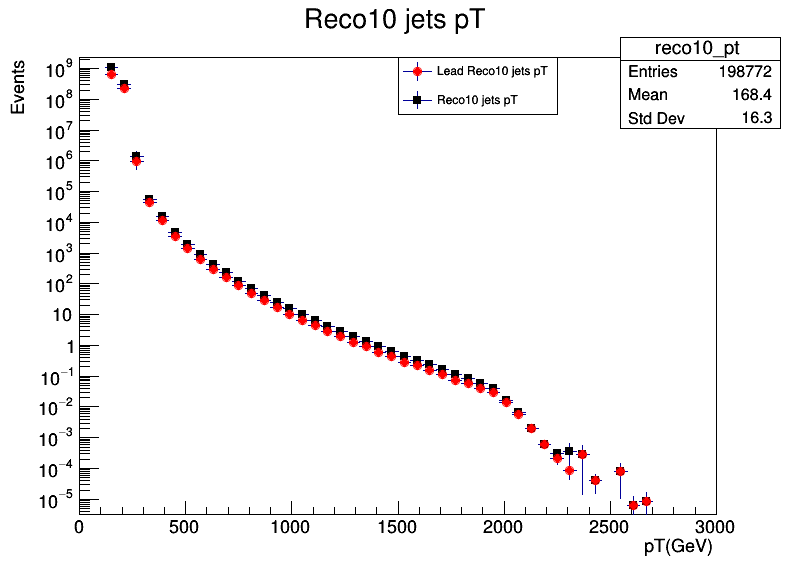

In [47]:
#Histograms Reco10 jets pT:
hist_reco10_pt.SetMarkerStyle(21);
hist_reco10_pt.SetMarkerColor(1);
hist_reco10_pt.Draw("");
hist_leadreco10_pt.SetMarkerStyle(20);
hist_leadreco10_pt.SetMarkerColor(2);
hist_leadreco10_pt.Draw("same");
legendreco10=ROOT.TLegend(0.5,0.8,0.7,0.9);
legendreco10.AddEntry(hist_leadreco10_pt,"Lead Reco10 jets pT","lep");
legendreco10.AddEntry(hist_reco10_pt,"Reco10 jets pT","lep");
legendreco10.Draw();
canvas.SetLogy();
canvas.Draw();
canvas.Print("LeadReco10jets_pTvsReco10jets_pT.png");


Info in <TCanvas::Print>: png file LeadTruth10jets_pTvsTruth10jets_pT.png has been created


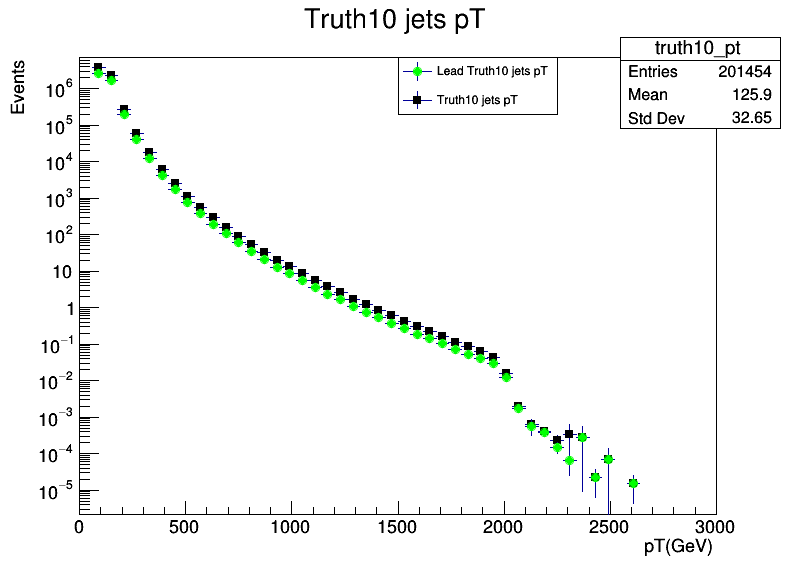

In [49]:
#Histograms Truth10 jets pT:
hist_truth10_pt.SetMarkerStyle(21);
hist_truth10_pt.SetMarkerColor(1);
hist_truth10_pt.Draw("");
hist_leadtruth10_pt.SetMarkerStyle(20);
hist_leadtruth10_pt.SetMarkerColor(3);
hist_leadtruth10_pt.Draw("same");
legendtruth10=ROOT.TLegend(0.5,0.8,0.7,0.9);
legendtruth10.AddEntry(hist_leadtruth10_pt,"Lead Truth10 jets pT","lep");
legendtruth10.AddEntry(hist_truth10_pt,"Truth10 jets pT","lep");
legendtruth10.Draw();
canvas.SetLogy();
canvas.Draw();
canvas.Print("LeadTruth10jets_pTvsTruth10jets_pT.png");

Info in <TCanvas::Print>: png file LeadReco10jets_pTvsLeadTruth10jets_pT.png has been created


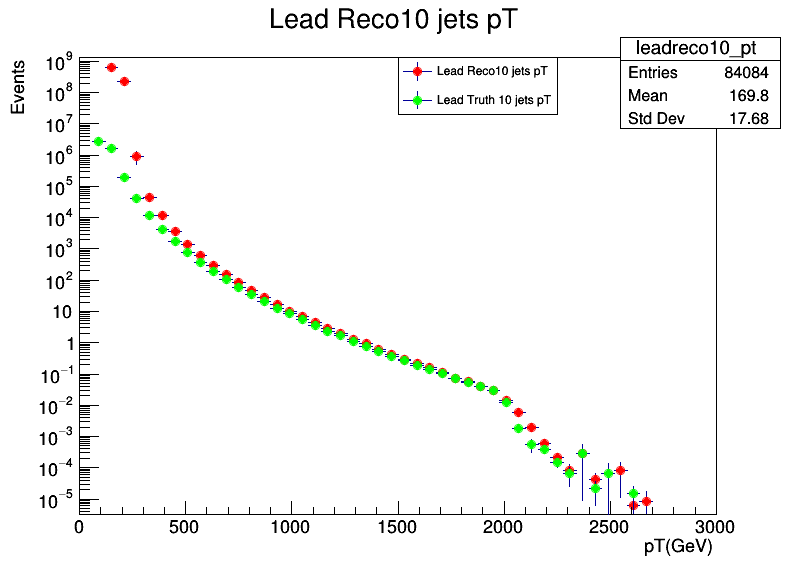

In [50]:
#Lead Reco10 jets pT compared with Lead Truth jets pT:
hist_leadreco10_pt.SetMarkerStyle(20);
hist_leadreco10_pt.SetMarkerColor(2);
hist_leadreco10_pt.Draw("");
hist_leadtruth10_pt.SetMarkerStyle(20);
hist_leadtruth10_pt.SetMarkerColor(3);
hist_leadtruth10_pt.Draw("same");
legendrt10=ROOT.TLegend(0.5,0.8,0.7,0.9);
legendrt10.AddEntry(hist_leadreco10_pt,"Lead Reco10 jets pT","lep");
legendrt10.AddEntry(hist_leadtruth10_pt,"Lead Truth 10 jets pT","lep");
legendrt10.Draw();
canvas.SetLogy();
canvas.Draw();
canvas.Print("LeadReco10jets_pTvsLeadTruth10jets_pT.png");

2. Lead RecoJets pT vs Lead TruthJets pT **withouth** event weight:

In [51]:
#Create histograms and fill them:
hist_leadreco10wow_pt=ROOT.TH1F("leadreco10_pt","Lead Reco10 jets pT; pT(GeV); Events",50,0,3000)
hist_reco10wow_pt=ROOT.TH1F("reco10_pt","Reco10 jets pT; pT(GeV); Events",50,0,3000)
hist_leadtruth10wow_pt=ROOT.TH1F("leadtruth10_pt","Lead Truth10 jets pT; pT(GeV); Events",50,0,3000)
hist_truth10wow_pt=ROOT.TH1F("truth10_pt","Truth10 jets pT; pT(GeV); Events",50,0,3000)

Warning in <TWebFile::Append>: Replacing existing TH1: leadreco10_pt (Potential memory leak).
Warning in <TWebFile::Append>: Replacing existing TH1: reco10_pt (Potential memory leak).
Warning in <TWebFile::Append>: Replacing existing TH1: leadtruth10_pt (Potential memory leak).
Warning in <TWebFile::Append>: Replacing existing TH1: truth10_pt (Potential memory leak).


In [52]:
#Reco10 jets wow:
for event in tree:
    if tree.RecoJets_R10_pt.size()>0:
      hist_leadreco10wow_pt.Fill(tree.RecoJets_R10_pt.at(0)/1000)
    for tr in range(tree.RecoJets_R10_pt.size()):
         hist_reco10wow_pt.Fill(tree.RecoJets_R10_pt.at(tr)/1000)
    
print("Done!")

Done!


In [53]:
#Truth10 jets wow:
for event in tree:
    if tree.TruthJets_R10_pt.size()>0:
      hist_leadtruth10wow_pt.Fill(tree.TruthJets_R10_pt.at(0)/1000)
    for tr in range(tree.TruthJets_R10_pt.size()):
         hist_truth10wow_pt.Fill(tree.TruthJets_R10_pt.at(tr)/1000)
    
print("Done!")

Done!


Info in <TCanvas::Print>: png file LeadReco10wowjets_pTvsReco10wowjets_pT.png has been created


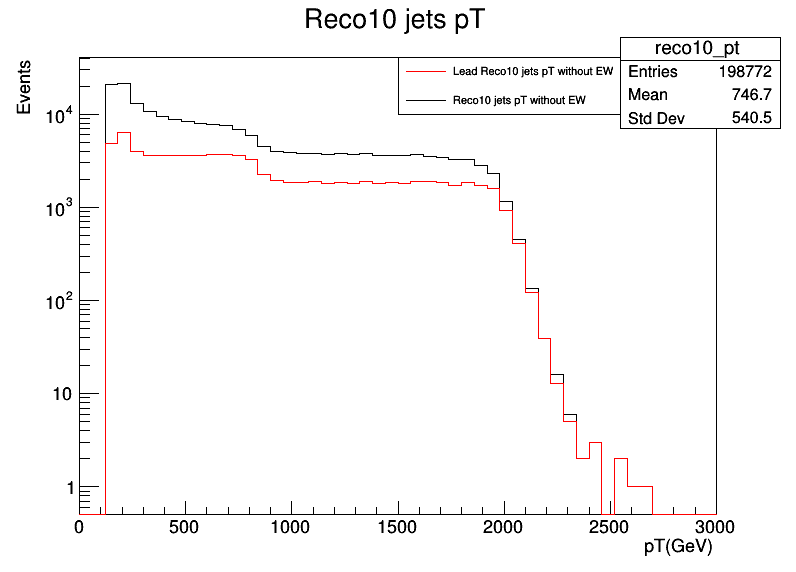

In [54]:
#Histograms Reco10 jets pT wow:
hist_reco10wow_pt.SetLineColor(1);
hist_reco10wow_pt.Draw("");
hist_leadreco10wow_pt.SetLineColor(2);
hist_leadreco10wow_pt.Draw("same");
legendreco10wow=ROOT.TLegend(0.5,0.8,0.78,0.9);
legendreco10wow.AddEntry(hist_leadreco10wow_pt,"Lead Reco10 jets pT without EW","l");
legendreco10wow.AddEntry(hist_reco10wow_pt,"Reco10 jets pT without EW","l");
legendreco10wow.Draw();
canvas.SetLogy();
canvas.Draw();
canvas.Print("LeadReco10wowjets_pTvsReco10wowjets_pT.png");

Info in <TCanvas::Print>: png file LeadTruth10wowjets_pTvsTruth10wowjets_pT.png has been created


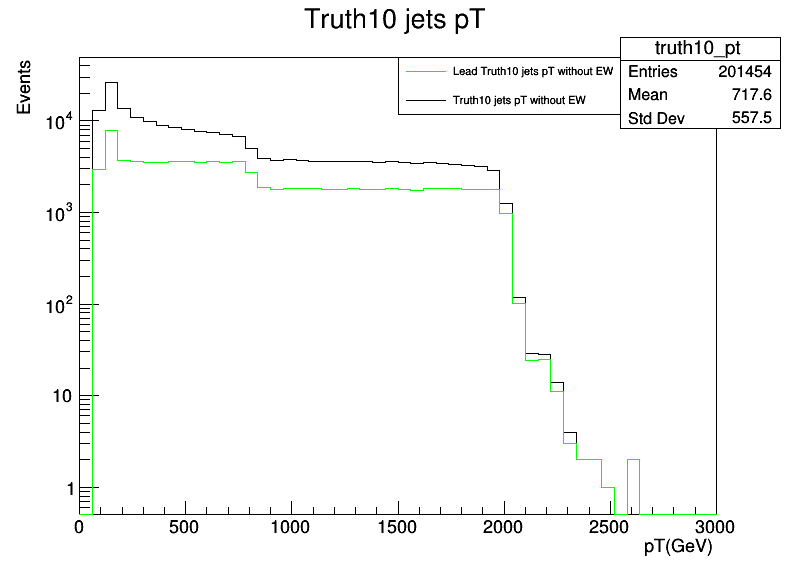

In [55]:
#Histograms Truth10 jets pT wow:
hist_truth10wow_pt.SetLineColor(1);
hist_truth10wow_pt.Draw("");
hist_leadtruth10wow_pt.SetLineColor(3);
hist_leadtruth10wow_pt.Draw("same");
legendtruth10wow=ROOT.TLegend(0.5,0.8,0.78,0.9);
legendtruth10wow.AddEntry(hist_leadtruth10wow_pt,"Lead Truth10 jets pT without EW","l");
legendtruth10wow.AddEntry(hist_truth10wow_pt,"Truth10 jets pT without EW","l");
legendtruth10wow.Draw();
canvas.SetLogy();
canvas.Draw();
canvas.Print("LeadTruth10wowjets_pTvsTruth10wowjets_pT.png");

Info in <TCanvas::Print>: png file LeadTruth10wowjets_pTvsLeadReco10wowjets_pT.png has been created


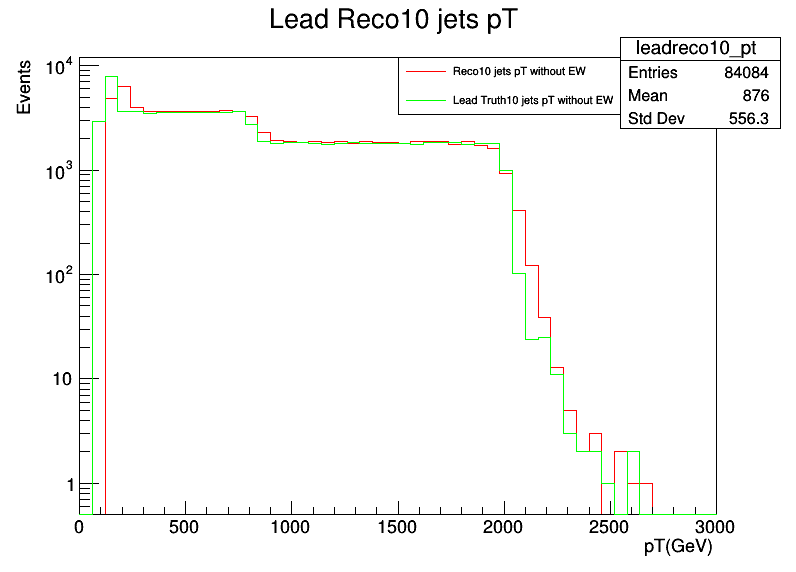

In [56]:
#Histograms comparing Lead Reco10 jets pT and Lead Truth10 jets pT wow:
hist_leadreco10wow_pt.SetLineColor(2);
hist_leadreco10wow_pt.Draw("");
hist_leadtruth10wow_pt.SetLineColor(3);
hist_leadtruth10wow_pt.Draw("same");
legendrt10wow=ROOT.TLegend(0.5,0.8,0.78,0.9);
legendrt10wow.AddEntry(hist_leadreco10wow_pt,"Reco10 jets pT without EW","l");
legendrt10wow.AddEntry(hist_leadtruth10wow_pt,"Lead Truth10 jets pT without EW","l");
legendrt10wow.Draw();
canvas.SetLogy();
canvas.Draw();
canvas.Print("LeadTruth10wowjets_pTvsLeadReco10wowjets_pT.png");

*   Comparing reconstructed JETS with the Anti- Kt -algorithm with R=1.0 and **Trimmed**:

1.   For Lead RecoJets pT vs Lead TruthJets pT **with** event weight:




In [57]:
#Create histograms and fill them:
hist_leadreco10T_pt=ROOT.TH1F("leadreco10T_pt","Lead Reco10 Trimmed jets pT; pT(GeV); Events",50,0,3000)
hist_reco10T_pt=ROOT.TH1F("reco10T_pt","Reco10 Trimmed jets pT; pT(GeV); Events",50,0,3000)
hist_leadtruth10T_pt=ROOT.TH1F("leadtruth10T_pt","Lead Truth10 Trimmed jets pT; pT(GeV); Events",50,0,3000)
hist_truth10T_pt=ROOT.TH1F("truth10T_pt","Truth10 Trimmed jets pT; pT(GeV); Events",50,0,3000)

In [58]:
#Reco10 Trimmed jets:
for event in tree:
    if tree.RecoJets_R10_Trimmed_pt.size()>0:
      hist_leadreco10T_pt.Fill(tree.RecoJets_R10_Trimmed_pt.at(0)/1000,tree.EventWeight)
    for tr in range(tree.RecoJets_R10_Trimmed_pt.size()):
         hist_reco10T_pt.Fill(tree.RecoJets_R10_Trimmed_pt.at(tr)/1000,tree.EventWeight)

In [59]:
#Truth10 Trimmed jets:
for event in tree:
    if tree.TruthJets_R10_Trimmed_pt.size()>0:
      hist_leadtruth10T_pt.Fill(tree.TruthJets_R10_Trimmed_pt.at(0)/1000,tree.EventWeight)
    for tr in range(tree.TruthJets_R10_Trimmed_pt.size()):
         hist_truth10T_pt.Fill(tree.TruthJets_R10_Trimmed_pt.at(tr)/1000,tree.EventWeight)
    
print("Done!")

Done!


In [60]:
canvas1=ROOT.TCanvas("canvas1","",800,600)

Info in <TCanvas::Print>: png file LeadReco10Tjets_pTvsReco10Tjets_pT.png has been created


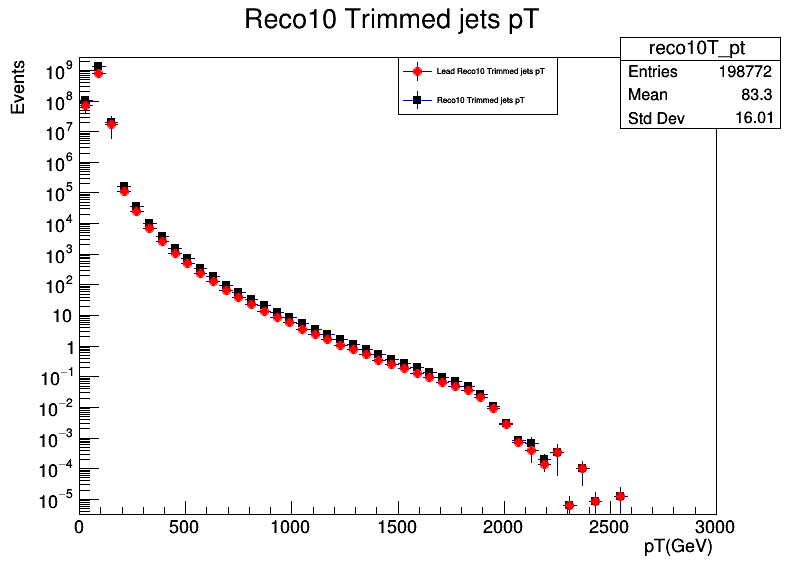

In [61]:
#Histograms Reco10 Trimmed jets pT:
hist_reco10T_pt.SetMarkerStyle(21);
hist_reco10T_pt.SetMarkerColor(1);
hist_reco10T_pt.Draw("");
hist_leadreco10T_pt.SetMarkerStyle(20);
hist_leadreco10T_pt.SetMarkerColor(2);
hist_leadreco10T_pt.Draw("same");
legendreco10T=ROOT.TLegend(0.5,0.8,0.7,0.9);
legendreco10T.AddEntry(hist_leadreco10T_pt,"Lead Reco10 Trimmed jets pT","lep");
legendreco10T.AddEntry(hist_reco10T_pt,"Reco10 Trimmed jets pT","lep");
legendreco10T.Draw();
canvas1.SetLogy();
canvas1.Draw();
canvas1.Print("LeadReco10Tjets_pTvsReco10Tjets_pT.png");

Info in <TCanvas::Print>: png file LeadTruth10Tjets_pTvsTruth10Tjets_pT.png has been created


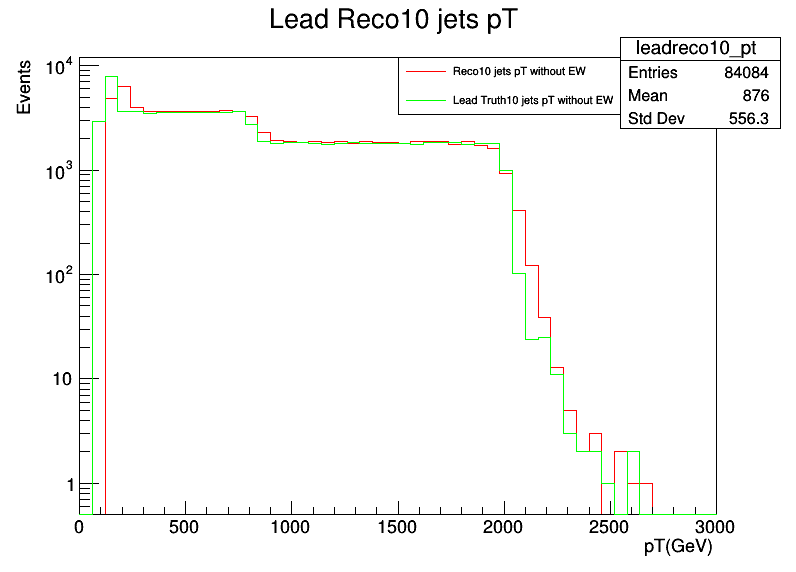

In [66]:
#Histograms Truth10 Trimmed jets pT:
hist_truth10T_pt.SetMarkerStyle(21);
hist_truth10T_pt.SetMarkerColor(1);
hist_truth10T_pt.Draw("");
hist_leadtruth10T_pt.SetMarkerStyle(20);
hist_leadtruth10T_pt.SetMarkerColor(3);
hist_leadtruth10T_pt.Draw("same");
legendtruth10T=ROOT.TLegend(0.5,0.8,0.7,0.9);
legendtruth10T.AddEntry(hist_leadtruth10T_pt,"Lead Truth10 Trimmed jets pT","lep");
legendtruth10T.AddEntry(hist_truth10T_pt,"Truth10 Trimmed jets pT","lep");
legendtruth10T.Draw();
canvas.SetLogy();
canvas.Draw();
canvas.Print("LeadTruth10Tjets_pTvsTruth10Tjets_pT.png");

Info in <TCanvas::Print>: png file LeadReco10Tjets_pTvsLeadTruth10Tjets_pT.png has been created


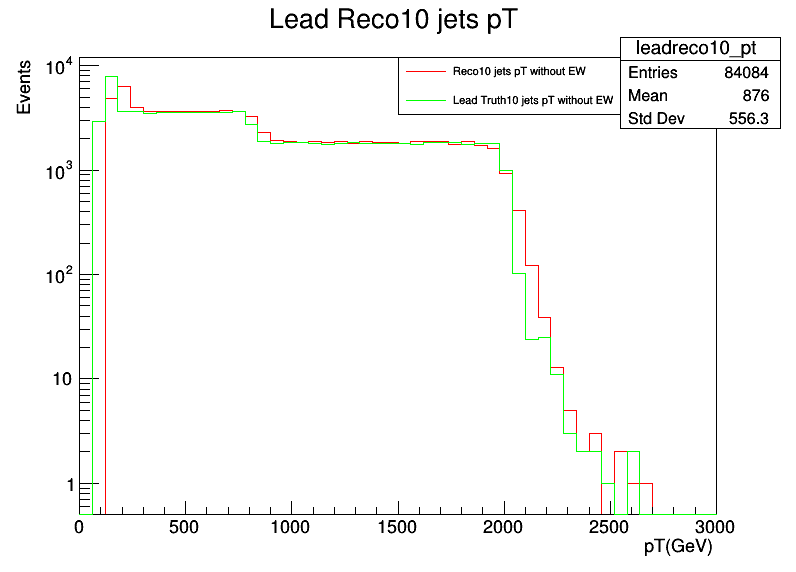

In [67]:
#Lead Reco10 Trimmed jets pT compared with Lead Truth10 Trimmed jets pT:
hist_leadreco10T_pt.SetMarkerStyle(20);
hist_leadreco10T_pt.SetMarkerColor(2);
hist_leadreco10T_pt.Draw("");
hist_leadtruth10T_pt.SetMarkerStyle(20);
hist_leadtruth10T_pt.SetMarkerColor(3);
hist_leadtruth10T_pt.Draw("same");
legendrt10T=ROOT.TLegend(0.5,0.8,0.7,0.9);
legendrt10T.AddEntry(hist_leadreco10T_pt,"Lead Reco10 Trimmed jets pT","lep");
legendrt10T.AddEntry(hist_leadtruth10T_pt,"Lead Truth10 Trimmed jets pT","lep");
legendrt10T.Draw();
canvas.SetLogy();
canvas.Draw();
canvas.Print("LeadReco10Tjets_pTvsLeadTruth10Tjets_pT.png");

2.  Lead RecoJets10 **Trimmed** pT vs Lead TruthJets10 **Trimmed** pT **withouth** event weight:



In [64]:
#Create histograms and fill them:
hist_leadreco10Twow_pt=ROOT.TH1F("leadreco10T_pt","Lead Reco10 Trimmed jets pT; pT(GeV); Events",50,0,3000)
hist_reco10Twow_pt=ROOT.TH1F("reco10T_pt","Reco10 Trimmed jets pT; pT(GeV); Events",50,0,3000)
hist_leadtruth10Twow_pt=ROOT.TH1F("leadtruth10T_pt","Lead Truth10 Trimmed jets pT; pT(GeV); Events",50,0,3000)
hist_truth10Twow_pt=ROOT.TH1F("truth10T_pt","Truth10 Trimmed jets pT; pT(GeV); Events",50,0,3000)


Warning in <TWebFile::Append>: Replacing existing TH1: leadreco10T_pt (Potential memory leak).
Warning in <TWebFile::Append>: Replacing existing TH1: reco10T_pt (Potential memory leak).
Warning in <TWebFile::Append>: Replacing existing TH1: leadtruth10T_pt (Potential memory leak).
Warning in <TWebFile::Append>: Replacing existing TH1: truth10T_pt (Potential memory leak).


In [65]:
#Reco10 Trimmed jets wow:
for event in tree:
    if tree.RecoJets_R10_Trimmed_pt.size()>0:
      hist_leadreco10Twow_pt.Fill(tree.RecoJets_R10_Trimmed_pt.at(0)/1000)
    for tr in range(tree.RecoJets_R10_Trimmed_pt.size()):
         hist_reco10Twow_pt.Fill(tree.RecoJets_R10_Trimmed_pt.at(tr)/1000)
    
print("Done!")

Done!


In [68]:
#Truth10 Trimmed jets wow:
for event in tree:
    if tree.TruthJets_R10_Trimmed_pt.size()>0:
      hist_leadtruth10Twow_pt.Fill(tree.TruthJets_R10_Trimmed_pt.at(0)/1000)
    for tr in range(tree.TruthJets_R10_Trimmed_pt.size()):
         hist_truth10Twow_pt.Fill(tree.TruthJets_R10_Trimmed_pt.at(tr)/1000)
    
print("Done!")

Done!


Info in <TCanvas::Print>: png file LeadReco10Twowjets_pTvsReco10Twowjets_pT.png has been created


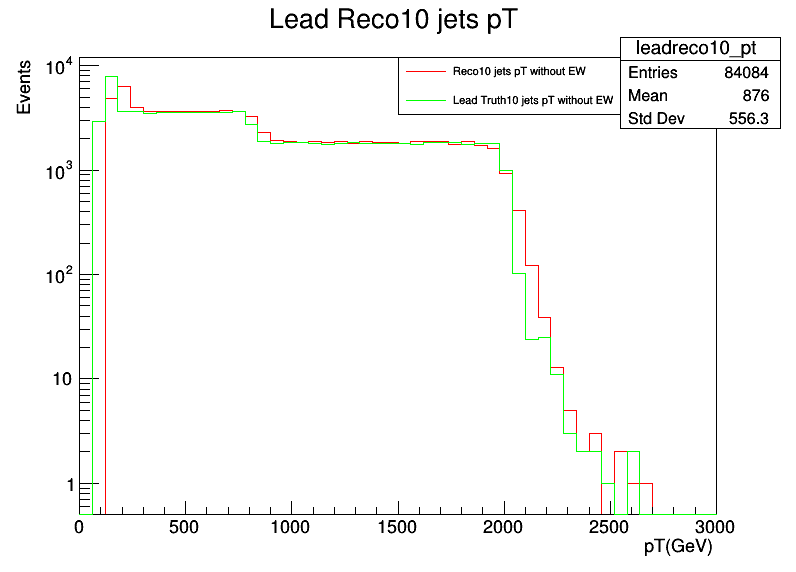

In [69]:
#Histograms Reco10 Trimmed jets pT wow:
hist_reco10Twow_pt.SetLineColor(1);
hist_reco10Twow_pt.Draw("");
hist_leadreco10Twow_pt.SetLineColor(2);
hist_leadreco10Twow_pt.Draw("same");
legendreco10Twow=ROOT.TLegend(0.5,0.8,0.78,0.9);
legendreco10Twow.AddEntry(hist_leadreco10Twow_pt,"Lead Reco10 Trimmed jets pT without EW","l");
legendreco10Twow.AddEntry(hist_reco10Twow_pt,"Reco10 Trimmed jets pT without EW","l");
legendreco10Twow.Draw();
canvas.SetLogy();
canvas.Draw();
canvas.Print("LeadReco10Twowjets_pTvsReco10Twowjets_pT.png");

Info in <TCanvas::Print>: png file LeadTruth10Twowjets_pTvsTruth10Twowjets_pT.png has been created


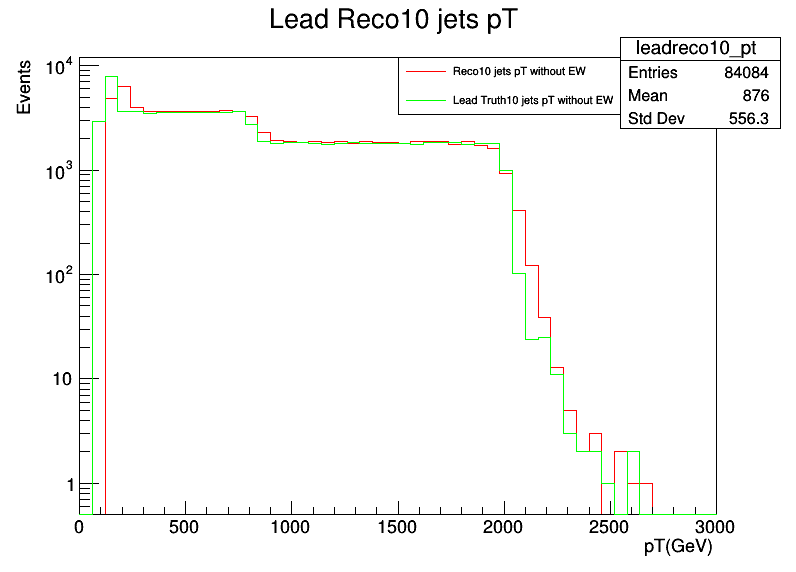

In [70]:
#Histograms Truth10 Trimmed jets pT wow:
hist_truth10Twow_pt.SetLineColor(1);
hist_truth10Twow_pt.Draw("");
hist_leadtruth10Twow_pt.SetLineColor(3);
hist_leadtruth10Twow_pt.Draw("same");
legendtruth10Twow=ROOT.TLegend(0.5,0.8,0.78,0.9);
legendtruth10Twow.AddEntry(hist_leadtruth10Twow_pt,"Lead Truth10 Trimmed jets pT without EW","l");
legendtruth10Twow.AddEntry(hist_truth10Twow_pt,"Truth10 Trimmed jets pT without EW","l");
legendtruth10Twow.Draw();
canvas.SetLogy();
canvas.Draw();
canvas.Print("LeadTruth10Twowjets_pTvsTruth10Twowjets_pT.png");

Info in <TCanvas::Print>: png file LeadTruth10Twowjets_pTvsLeadReco10Twowjets_pT.png has been created


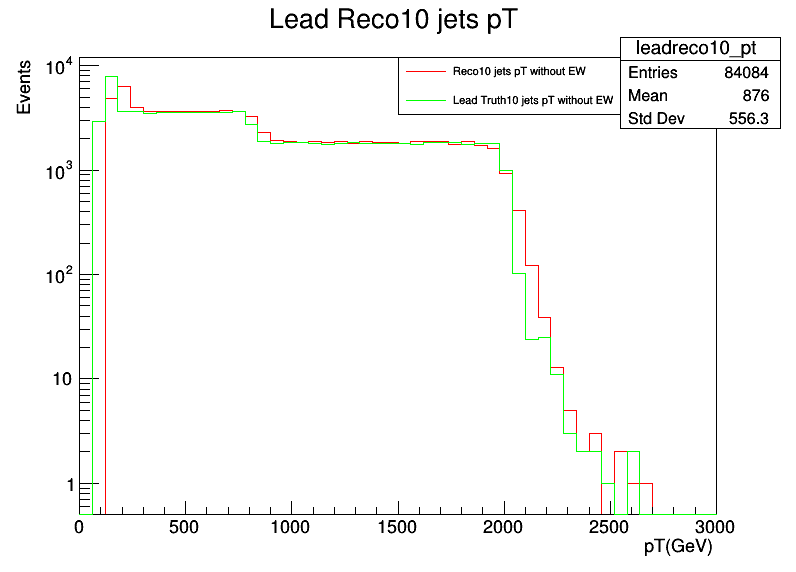

In [71]:
#Histograms comparing Lead Reco10 Trimmed jets pT and Lead Truth10 Trimmed jets pT wow:
hist_leadreco10Twow_pt.SetLineColor(2);
hist_leadreco10Twow_pt.Draw("");
hist_leadtruth10Twow_pt.SetLineColor(3);
hist_leadtruth10Twow_pt.Draw("same");
legendrt10Twow=ROOT.TLegend(0.5,0.8,0.78,0.9);
legendrt10Twow.AddEntry(hist_leadreco10Twow_pt,"Reco10 Trimmed jets pT without EW","l");
legendrt10Twow.AddEntry(hist_leadtruth10Twow_pt,"Lead Truth10 Trimmed jets pT without EW","l");
legendrt10Twow.Draw();
canvas.SetLogy();
canvas.Draw();
canvas.Print("LeadTruth10Twowjets_pTvsLeadReco10Twowjets_pT.png");

******************************************************************************
Now we will study the jets pileup dependence. 
Plot jet pt vs. pileup:

In [50]:
hist_jetpt_npv=ROOT.TH2F("Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50,20, 0,200)
prof_jetpt_npv=ROOT.TProfile("Profile Reco jet pT vs. NPV",";NPV; jet pT",50,1,50)

Create a new canvas to plot it:

In [51]:
canvas2=ROOT.TCanvas("canvas2","",800,600);

Fill the histograms: Make a cut to accept events with at least one jet and require the leading jet to have pT above 20 GeV

In [52]:
for event in tree:
  if tree.RecoJets_R4_pt.size()!=0 and tree.RecoJets_R4_pt.at(0)>20000:
    for i in range(tree.RecoJets_R4_pt.size()):
      hist_jetpt_npv.Fill(tree.NPV,tree.RecoJets_R4_pt.at(i)/1000,tree.EventWeight);
      prof_jetpt_npv.Fill(tree.NPV,tree.RecoJets_R4_pt.at(i)/1000,tree.EventWeight);

print("Done!")

Done!


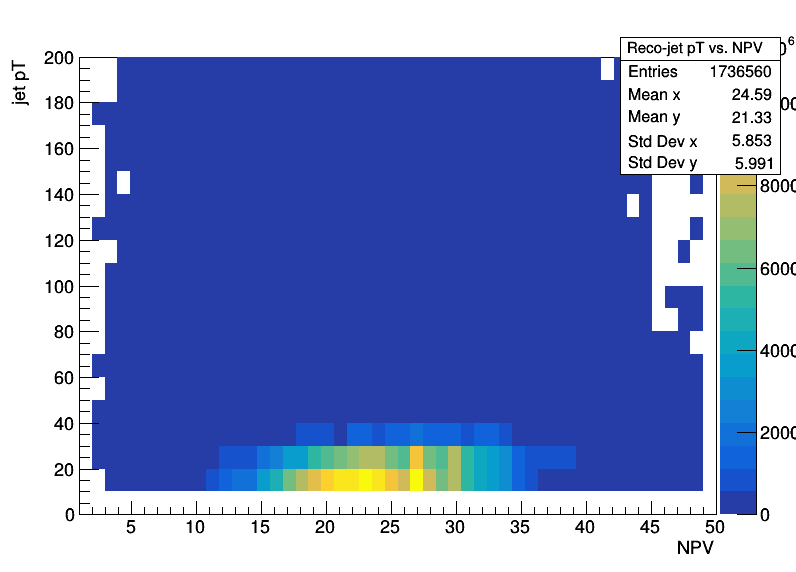

In [53]:
#Plot the 2D histogram:
hist_jetpt_npv.Draw("colz");
canvas2.Draw();
#canvas2.Print("2Dhistogram_RecojetR4pT_vs_NPV.png");

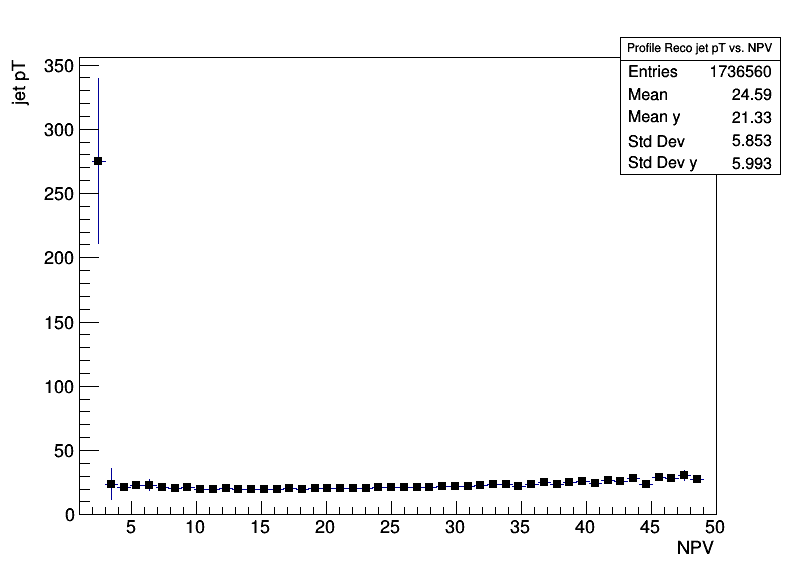

In [54]:
#And plot the profile:
prof_jetpt_npv.SetMarkerStyle(21);
prof_jetpt_npv.SetMarkerColor(1);
prof_jetpt_npv.Draw("");
canvas2.Draw();
#canvas2.Print("Profile_RecojetR4pT_vs_NPV.png");

**Exercise 3: Make plots for reco and truth jet pT vs. pileup. Interpret your results.**

**Solution:**

1.   For Reco R4 jets vs. mu_average:




In [55]:
#Create the new 2D histogram and profile, and fill them:
hist_jetpt_mu=ROOT.TH2F("Reco-jet pT vs. mu_average","RecoR4-jet pT vs mu_average; mu_average; jet pT",50,1,90,50,0,200)
prof_jetpt_mu=ROOT.TProfile("Profile Reco jet pT vs. mu_average","Profile RecoR4-jet pT vs mu_average;mu_average; jet pT",50,1,90)

In [56]:
for event in tree:
  if tree.RecoJets_R4_pt.size()!=0 and tree.RecoJets_R4_pt.at(0)>20000:
    for i in range(tree.RecoJets_R4_pt.size()):
      hist_jetpt_mu.Fill(tree.mu_average,tree.RecoJets_R4_pt.at(i)/1000,tree.EventWeight);
      prof_jetpt_mu.Fill(tree.mu_average,tree.RecoJets_R4_pt.at(i)/1000,tree.EventWeight);

print("Done!")

Done!


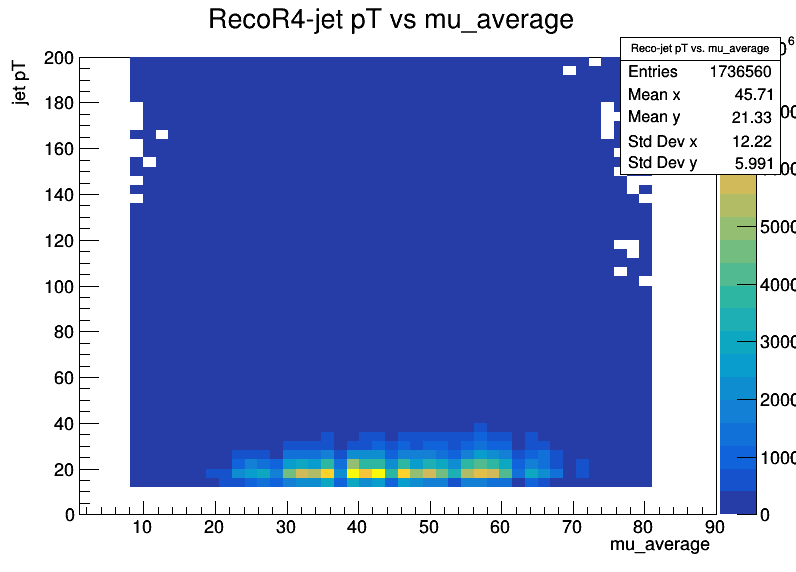

In [57]:
#Ploting the 2D histogram:
hist_jetpt_mu.Draw("colz");
canvas2.Draw();
#canvas2.Print("2Dhistogram_RecojetR4pT_vs_mu_average.png");

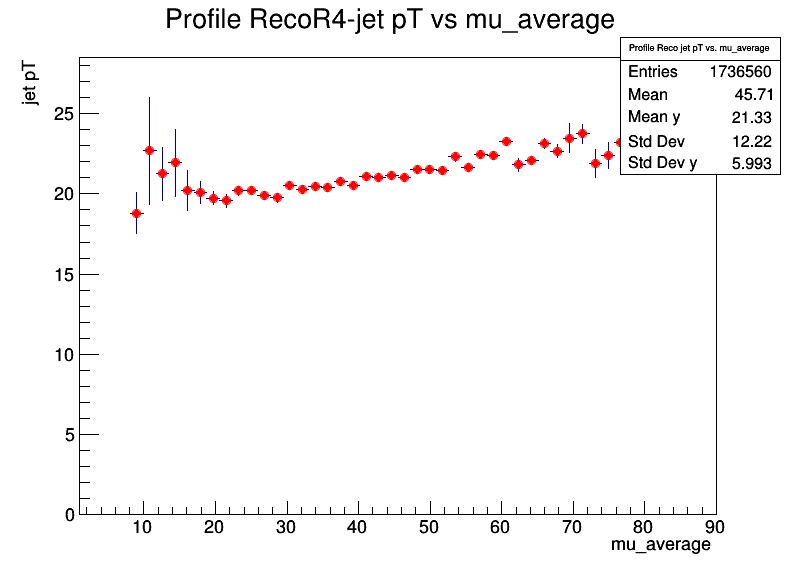

In [58]:
#And ploting the profile:
prof_jetpt_mu.SetMarkerStyle(20);
prof_jetpt_mu.SetMarkerColor(2);
prof_jetpt_mu.Draw();
canvas2.Draw();
#canvas2.Print("Profile_RecojetR4pT_vs_mu_average.png");

From "RecoR4-jet pT vs mu_average" histogram we can see that the majority of events lie for a mu_average between 30 and 60, and a jet pT around 20GeV. 

And the "Profile RecoR4-jet pT vs mu_average" graph is the projection of the above data over a straight line. Therefore, we can see how the most expected value for jet pT is around 20 GeV but is also increasing with mu_average. Then, we can conclude that the pileup is strongly affecting the jet pT for this case.



2.   For Truth R4 jets vs. pile up:

*   Truth R4 jets vs. NPV:






In [59]:
#Create the histogram and profile, and fill them:
hist_jetTpt_npv=ROOT.TH2F("TruthR4-jet pT vs NPV","TruthR4-jet pT vs NPV; NPV; jet pT",50,1,50,50,0,200)
prof_jetTpt_npv=ROOT.TProfile("Profile TruthR4-jet pT vs NPV","ProfileTruthR4-jet pT vs NPV; NPV; jet pT",50,1,50)

In [60]:
for event in tree:
  if tree.TruthJets_R4_pt.size()!=0 and tree.TruthJets_R4_pt.at(0)>20000:
    for i in range(tree.TruthJets_R4_pt.size()):
      hist_jetTpt_npv.Fill(tree.NPV,tree.TruthJets_R4_pt.at(i)/1000,tree.EventWeight);
      prof_jetTpt_npv.Fill(tree.NPV,tree.TruthJets_R4_pt.at(i)/1000,tree.EventWeight);

print("Done!")

Done!


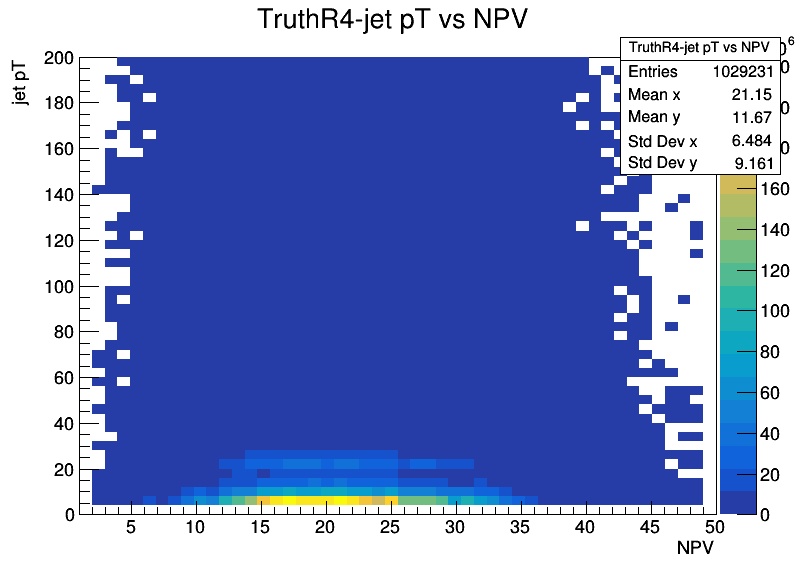

In [61]:
#Plots:
hist_jetTpt_npv.Draw("colz");
canvas2.Draw();
#canvas2.Print("2Dhistogram_TruthjetR4pT_vs_NPV.png");

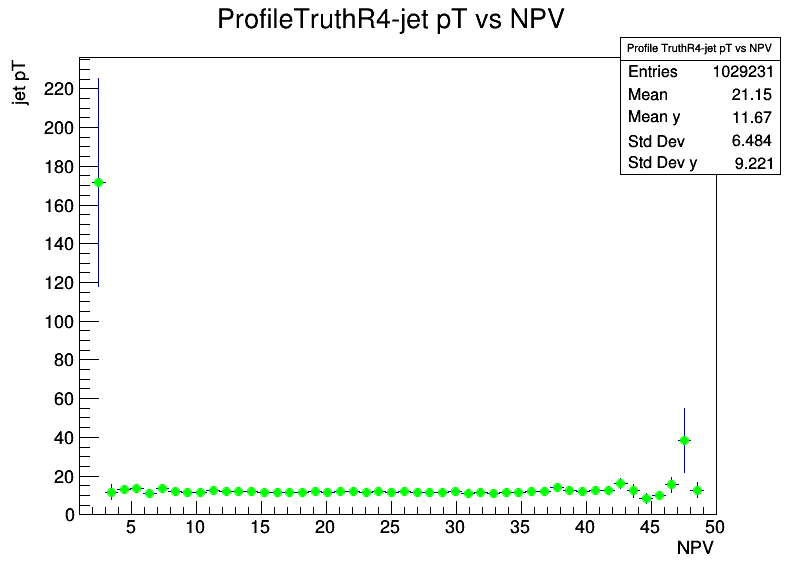

In [62]:
prof_jetTpt_npv.SetMarkerStyle(20);
prof_jetTpt_npv.SetMarkerColor(3);
prof_jetTpt_npv.Draw();
canvas2.Draw();
#canvas2.Print("Profile_TruthjetR4pT_vs_NPV.png");



*   Truth R4 jets vs. mu_average:



In [63]:
#Create the histogram and profile, and fill them:
hist_jetTpt_mu=ROOT.TH2F("TruthR4-jet pT vs mu_average","TruthR4-jet pT vs mu_average; mu_average; jet pT",50,1,90,50,0,200)
prof_jetTpt_mu=ROOT.TProfile("Profile TruthR4-jet pT vs mu_average","ProfileTruthR4-jet pT vs mu_average; mu_average; jet pT",50,1,90)

In [64]:
for event in tree:
  if tree.TruthJets_R4_pt.size()!=0 and tree.TruthJets_R4_pt.at(0)>20000:
    for i in range(tree.TruthJets_R4_pt.size()):
      hist_jetTpt_mu.Fill(tree.mu_average,tree.TruthJets_R4_pt.at(i)/1000,tree.EventWeight);
      prof_jetTpt_mu.Fill(tree.mu_average,tree.TruthJets_R4_pt.at(i)/1000,tree.EventWeight);

print("Done!")

Done!


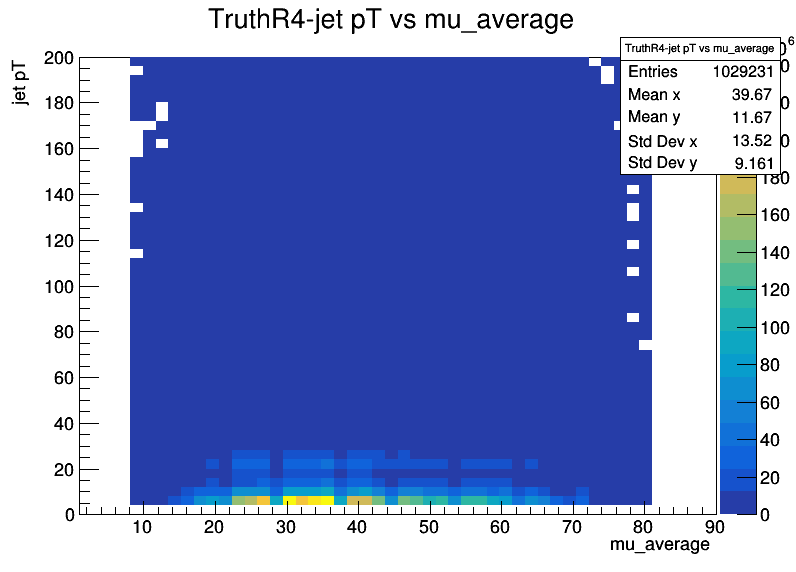

In [65]:
#Plots:
hist_jetTpt_mu.Draw("colz");
canvas2.Draw();
#canvas2.Print("2Dhistogram_TruthR4pT_vs_mu_average.png");

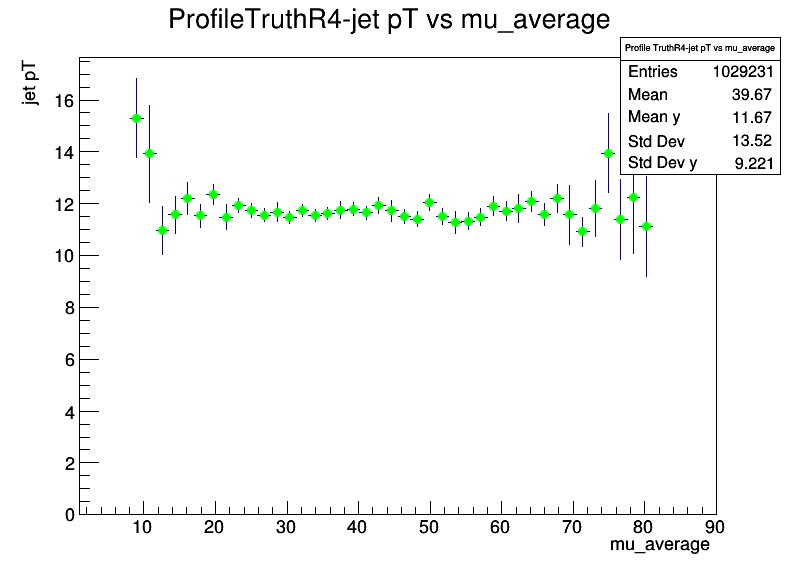

In [66]:
prof_jetTpt_mu.SetMarkerStyle(20);
prof_jetTpt_mu.SetMarkerColor(3);
prof_jetTpt_mu.Draw();
canvas2.Draw();
#canvas2.Print("Profile_TruthjetR4pT_vs_mu_average.png");

From the above profiles we can say that Truth R4 jet pT is fairly stable against NPV and mu_average, i.e., it is stable against pile up, which makes sense because truth jets are reconstructed from particles and to simulate those particles there was pile-up corrections probably.


3.   For Reco R10 jets vs. pileup:


*   Reco R10 jets vs. NPV:





In [67]:
#Create the histogram and profile, and fill them:
hist_jet10pt_npv=ROOT.TH2F("Reco10-jet pT vs. NPV","RecoR10-jet pT vs NPV; NPV; jet pT",50,1,50,50,140,400)
prof_jet10pt_npv=ROOT.TProfile("Profile RecoR10 jet pT vs. NPV","Profile RecoR10-jet pT vs NPV;NPV; jet pT",50,1,50)

In [68]:
for event in tree:
  if tree.RecoJets_R10_pt.size()!=0 and tree.RecoJets_R10_pt.at(0)>20000:
    for i in range(tree.RecoJets_R10_pt.size()):
      hist_jet10pt_npv.Fill(tree.NPV,tree.RecoJets_R10_pt.at(i)/1000,tree.EventWeight);
      prof_jet10pt_npv.Fill(tree.NPV,tree.RecoJets_R10_pt.at(i)/1000,tree.EventWeight);

print("Done!")

Done!


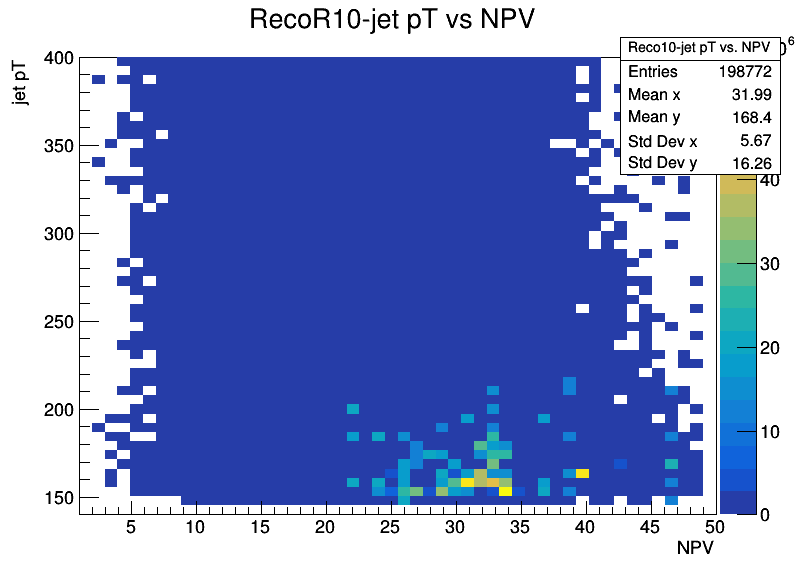

In [69]:
hist_jet10pt_npv.Draw("colz");
canvas2.Draw();
#canvas2.Print("2Dhistogram_RecojetR10pT_vs_NPV.png");

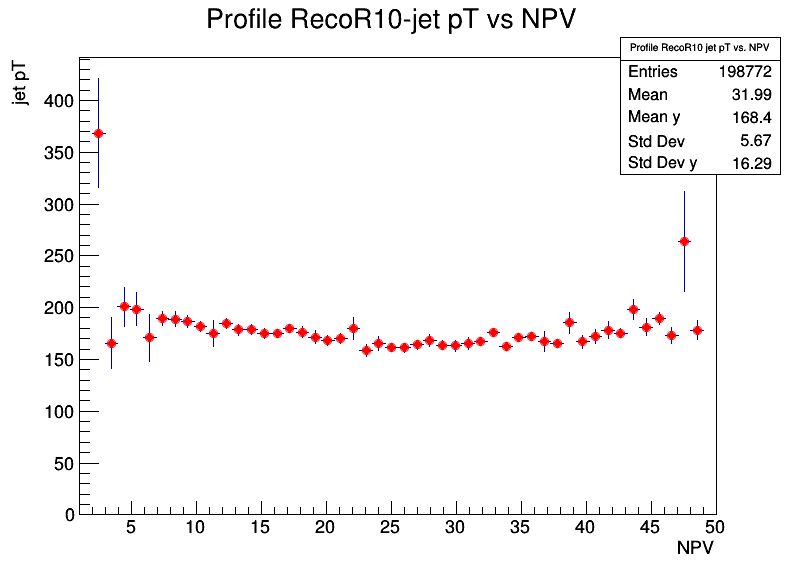

In [70]:
prof_jet10pt_npv.SetMarkerStyle(20);
prof_jet10pt_npv.SetMarkerColor(2);
prof_jet10pt_npv.Draw();
canvas2.Draw();
#canvas2.Print("Profile_RecojetR10pT_vs_NPV.png");



*   Reco R10 jets vs. mu_average:



In [71]:
#Create the histogram and profile, and fill them:
hist_jet10pt_mu=ROOT.TH2F("Reco10-jet pT vs. mu_average","RecoR10-jet pT vs mu_average; mu_average; jet pT",50,1,90,50,140,400)
prof_jet10pt_mu=ROOT.TProfile("Profile RecoR10 jet pT vs. mu_average","Profile RecoR10-jet pT vs mu_average;mu_average; jet pT",50,1,90)

In [72]:
for event in tree:
  if tree.RecoJets_R10_pt.size()!=0 and tree.RecoJets_R10_pt.at(0)>20000:
    for i in range(tree.RecoJets_R10_pt.size()):
      hist_jet10pt_mu.Fill(tree.mu_average,tree.RecoJets_R10_pt.at(i)/1000,tree.EventWeight);
      prof_jet10pt_mu.Fill(tree.mu_average,tree.RecoJets_R10_pt.at(i)/1000,tree.EventWeight);

print("Done!")

Done!


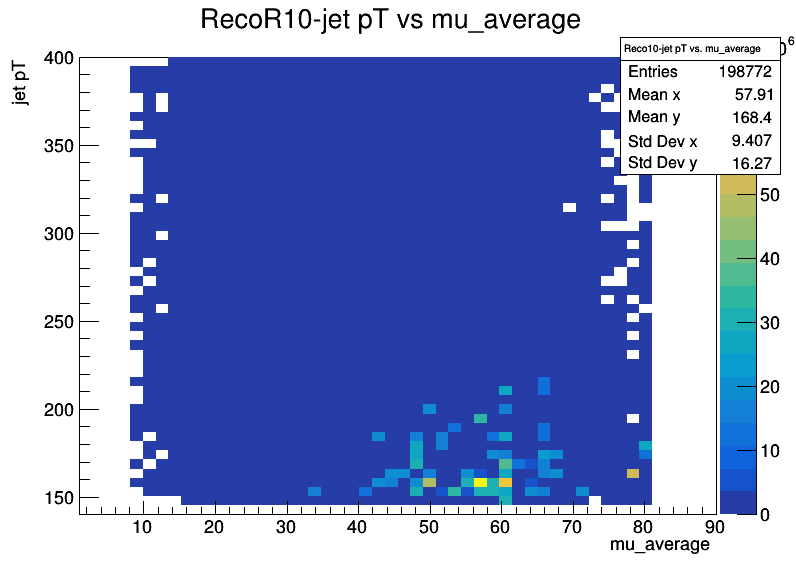

In [73]:
#Plots:
hist_jet10pt_mu.Draw("colz");
canvas2.Draw();
#canvas2.Print("2Dhistogram_RecojetR10pT_vs_mu_average.png");

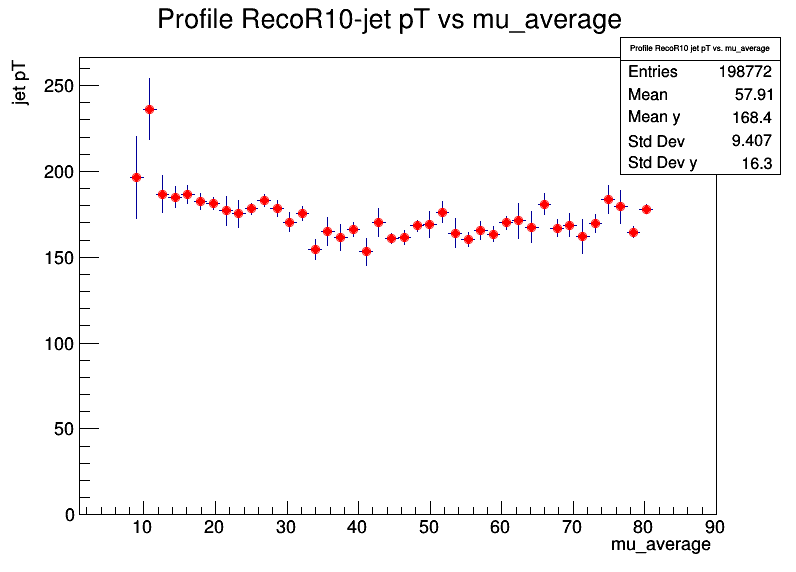

In [74]:
prof_jet10pt_mu.SetMarkerStyle(20);
prof_jet10pt_mu.SetMarkerColor(2);
prof_jet10pt_mu.Draw();
canvas2.Draw();
#canvas2.Print("Profile_RecojetR10pT_vs_mu_average.png");

From above profiles for RecoR10 jet pT we can say that it is fairly stable against pileup (vs NPV and vs mu_average), however, in both cases it seems to appear a thin negative slope, which means pile up is affecting the jet pT.

4.   For Truth R10 jets vs. pile up:

*   Truth R10 jets vs. NPV



In [75]:
#Create the histogram and profile, and fill them:
hist_jetT10pt_npv=ROOT.TH2F("TruthR10-jet pT vs NPV","TruthR10-jet pT vs NPV; NPV; jet pT",50,1,50,50,140,350)
prof_jetT10pt_npv=ROOT.TProfile("Profile TruthR10-jet pT vs NPV","ProfileTruthR10-jet pT vs NPV; NPV; jet pT",50,1,50)

In [76]:
for event in tree:
  if tree.TruthJets_R10_pt.size()!=0 and tree.TruthJets_R10_pt.at(0)>20000:
    for i in range(tree.TruthJets_R10_pt.size()):
      hist_jetT10pt_npv.Fill(tree.NPV,tree.TruthJets_R10_pt.at(i)/1000,tree.EventWeight);
      prof_jetT10pt_npv.Fill(tree.NPV,tree.TruthJets_R10_pt.at(i)/1000,tree.EventWeight);

print("Done!")

Done!


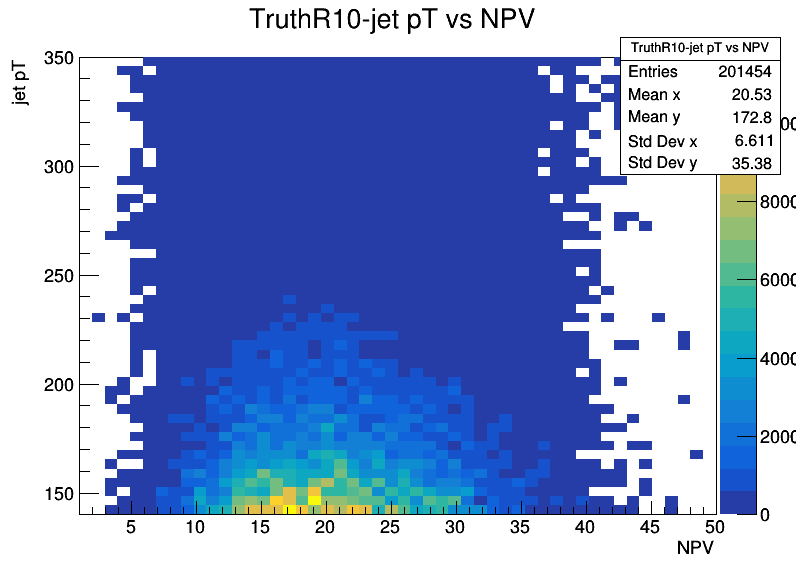

In [77]:
#Plots:
hist_jetT10pt_npv.Draw("colz");
canvas2.Draw();
#canvas2.Print("2Dhistogram_TruthjetR10pT_vs_NPV.png");

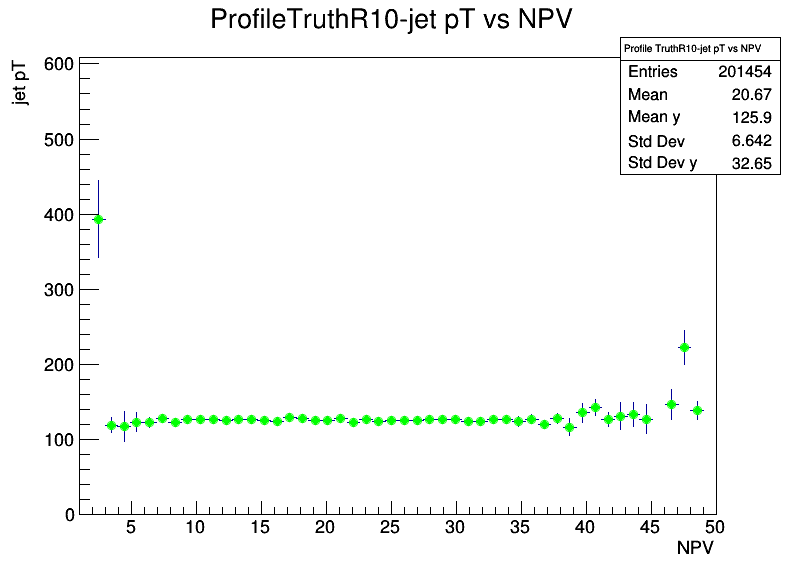

In [78]:
prof_jetT10pt_npv.SetMarkerStyle(20);
prof_jetT10pt_npv.SetMarkerColor(3);
prof_jetT10pt_npv.Draw();
canvas2.Draw();
#canvas2.Print("Profile_TruthjetR10pT_vs_NPV.png");



*   Truth R10 jets vs. mu_average


In [79]:
#Create the histogram and profile, and fill them:
hist_jetT10pt_mu=ROOT.TH2F("TruthR10-jet pT vs mu_average","TruthR10-jet pT vs mu_average; mu_average; jet pT",50,1,90,50,140,350)
prof_jetT10pt_mu=ROOT.TProfile("Profile TruthR10-jet pT vs mu_average","ProfileTruthR10-jet pT vs mu_average; mu_average; jet pT",50,1,90)

In [80]:
for event in tree:
  if tree.TruthJets_R10_pt.size()!=0 and tree.TruthJets_R10_pt.at(0)>20000:
    for i in range(tree.TruthJets_R10_pt.size()):
      hist_jetT10pt_mu.Fill(tree.mu_average,tree.TruthJets_R10_pt.at(i)/1000,tree.EventWeight);
      prof_jetT10pt_mu.Fill(tree.mu_average,tree.TruthJets_R10_pt.at(i)/1000,tree.EventWeight);

print("Done!")

Done!


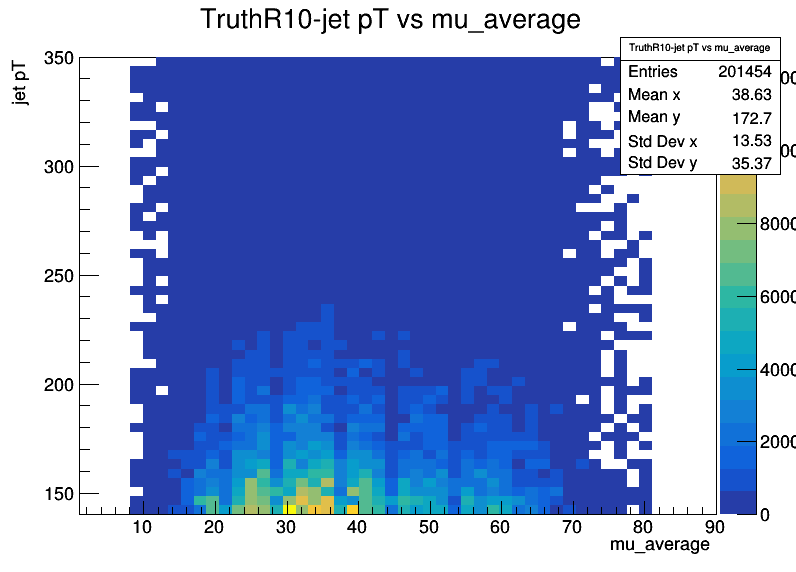

In [81]:
#Plots:
hist_jetT10pt_mu.Draw("colz");
canvas2.Draw();
#canvas2.Print("2Dhistogram_TruthR10pT_vs_mu_average.png");

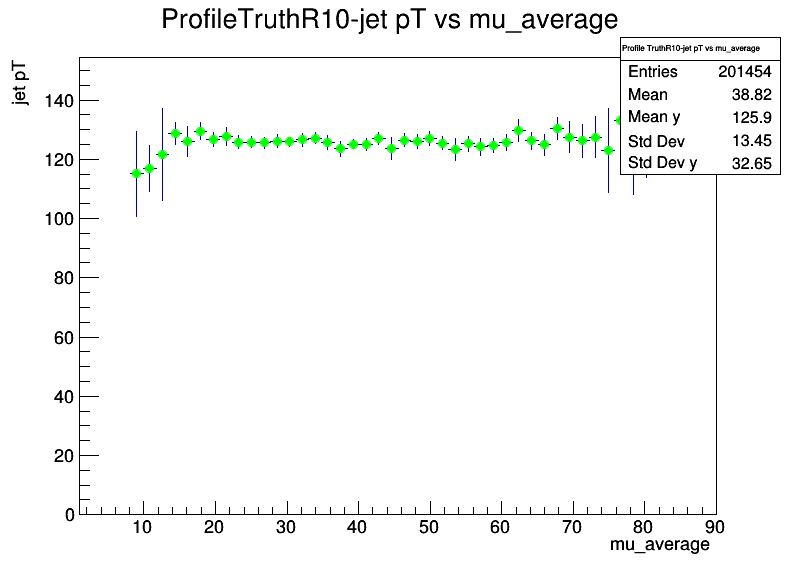

In [82]:
prof_jetT10pt_mu.SetMarkerStyle(20);
prof_jetT10pt_mu.SetMarkerColor(3);
prof_jetT10pt_mu.Draw();
canvas2.Draw();
#canvas2.Print("Profile_TruthjetR10pT_vs_mu_average.png");

From the above profiles for Truth R10 jets we can see that it is approximately stable against the pile-up, as well as the Truth R4 jets.

******************************************************************************
Plot the JVF (Jet Vertex Fraction) variable

In [83]:
hist_leadreco_jvf=ROOT.TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1);
hist_leadreco100_jvf=ROOT.TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1);

Warning in <TWebFile::Append>: Replacing existing TH1: Lead Reco-jet JVF (Potential memory leak).


In [84]:
for event in tree:
  if tree.RecoJets_R4_pt.size()!=0 and tree.RecoJets_R4_pt.at(0)>20000:
    hist_leadreco_jvf.Fill(tree.RecoJets_R4_jvf.at(0),tree.EventWeight)
    if tree.RecoJets_R4_pt.at(0)>100000:
      hist_leadreco100_jvf.Fill(tree.RecoJets_R4_jvf.at(0),tree.EventWeight)

print("Done.")    

Done.


Info in <TCanvas::Print>: png file LeadingjetJVF_RecoJetsR4.png has been created


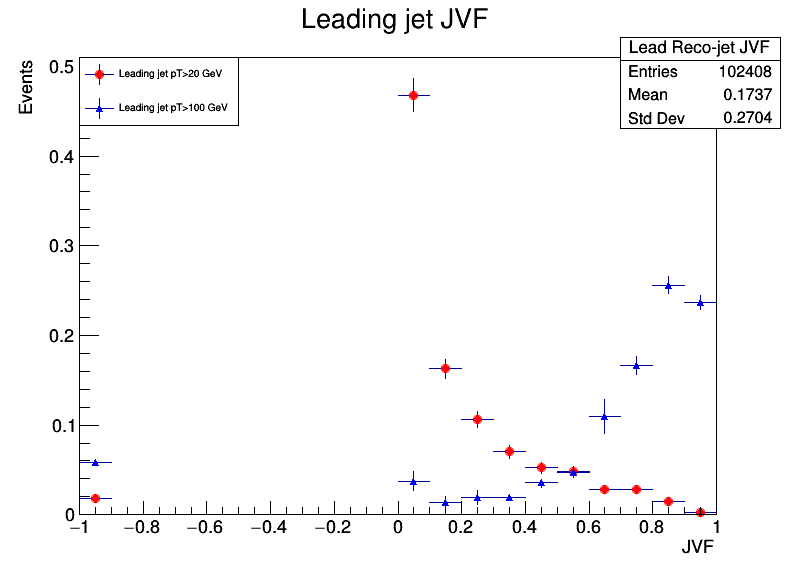

In [91]:
hist_leadreco_jvf.SetMarkerStyle(20);
hist_leadreco_jvf.SetMarkerColor(2);
hist_leadreco_jvf.DrawNormalized("");
hist_leadreco100_jvf.SetMarkerStyle(22);
hist_leadreco100_jvf.SetMarkerColor(4);
hist_leadreco100_jvf.DrawNormalized("same");
legendlrjvf=ROOT.TLegend(0.1,0.78,0.3,0.9);
legendlrjvf.AddEntry(hist_leadreco_jvf,"Leading jet pT>20 GeV","lep");
legendlrjvf.AddEntry(hist_leadreco100_jvf,"Leading jet pT>100 GeV","lep");
legendlrjvf.Draw();
canvas2.Draw();
canvas2.Print("LeadingjetJVF_RecoJetsR4.png");

**Exercises 4 and 5: Use a |JVF|>0.5 cut to compare the leading jet pT for truth jets, reco jets (w.o. the cut), and reco jets (with the cut), and repeat the same plots and comparisons with "Track-jets" and verify that they are stable against pileup**

**Solution:**



*   First, we establish the cut |JVF|>0.5 for the Reco R4 jets:




In [96]:
#create the histogram:
hist_leadrecocut_pt=ROOT.TH1F("Lead RecoR4-jet pT","Comparison leading R4 jets pT; pT(GeV);Events",50,0,200);

Warning in <TWebFile::Append>: Replacing existing TH1: Lead RecoR4-jet pT (Potential memory leak).


In [112]:
#Imposing the cut in the Reco R4 jets:
for event in tree:
  if tree.RecoJets_R4_pt.size()!=0 and tree.RecoJets_R4_pt.at(0)>20000 and abs(tree.RecoJets_R4_jvf.at(0))>0.5:
    hist_leadrecocut_pt.Fill(tree.RecoJets_R4_pt.at(0)/1000,tree.EventWeight)
print("Done.")   

Done.


Then, we plot in the same graph the lead truth jet pT, track jet pT and Reco jet pT with and without the cut, for R4 in all the cases.

Info in <TCanvas::Print>: png file Exercise4and5-ComparisonLeadTruth-Reco-RecoCut-Track-jetpT.png has been created


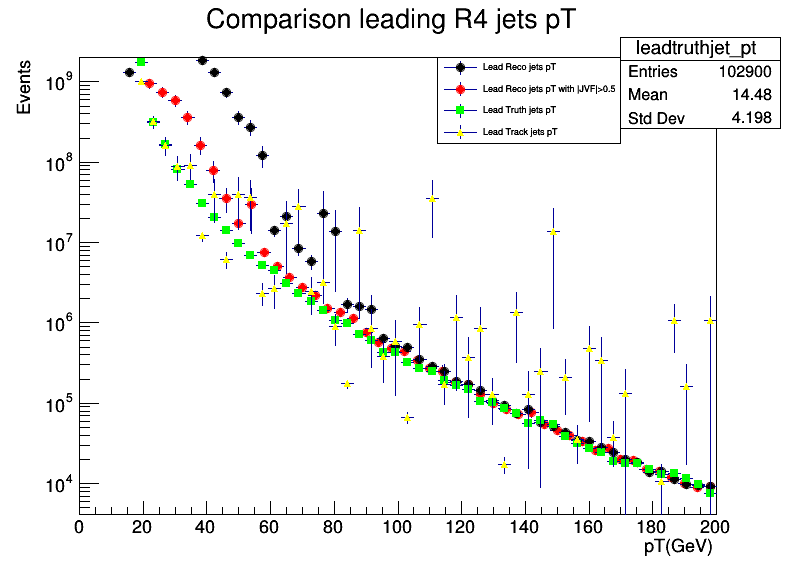

In [118]:
#ploting the leading Truth R4 jets vs reco jets with and without the cut:
hist_leadrecocut_pt.SetMarkerStyle(20);
hist_leadrecocut_pt.SetMarkerColor(2);
hist_leadrecocut_pt.Draw("");
hist_leadreco_pt.SetMarkerStyle(20);
hist_leadreco_pt.SetMarkerColor(1);
hist_leadreco_pt.Draw("same");
hist_leadtruthjet_pt.SetMarkerStyle(21);
hist_leadtruthjet_pt.SetMarkerColor(3);
hist_leadtruthjet_pt.Draw("same");
hist_leadtrackjets_pt.SetMarkerStyle(22);
hist_leadtrackjets_pt.SetMarkerColor(5);
hist_leadtrackjets_pt.Draw("same");
legend45=ROOT.TLegend(0.55,0.75,0.78,0.9);
legend45.AddEntry(hist_leadreco_pt,"Lead Reco jets pT","lep");
legend45.AddEntry(hist_leadrecocut_pt,"Lead Reco jets pT with |JVF|>0.5","lep");
legend45.AddEntry(hist_leadtruthjet_pt,"Lead Truth jets pT","lep");
legend45.AddEntry(hist_leadtrackjets_pt,"Lead Track jets pT","lep");
legend45.Draw();
canvas2.SetLogy();
canvas2.Draw();
canvas2.Print("Exercise4and5-ComparisonLeadTruth-Reco-RecoCut-Track-jetpT.png");

And verifying the stability of track jets (without the event weight) against pile up (vs. NPV and mu_average):

In [155]:
hist_trackjetsR4_npv=ROOT.TH2F("TrackR4-jet pT vs NPV","TrackR4-jets pT vs NPV; NPV; jet pT",50,1,50,50,140,350)
prof_trackjetsR4_npv=ROOT.TProfile("Profile TrackR4-jet pT vs NPV","ProfileTrackR4-jet-jet pT vs NPV; NPV; jet pT",50,1,50)

In [160]:
for event in tree:
  if tree.TrackJets_R4_pt.size()!=0 and tree.TrackJets_R4_pt.at(0)>20000:
    for i in range(tree.TrackJets_R4_pt.size()):
      hist_trackjetsR4_npv.Fill(tree.NPV,tree.TrackJets_R4_pt.at(i)/1000);
      prof_trackjetsR4_npv.Fill(tree.NPV,tree.TrackJets_R4_pt.at(i)/1000);

print("Done!")

Done!


In [5]:
#Create a new canva because the old one kept the LogScale
canvas3=ROOT.TCanvas("canvas3","",800,600);

Info in <TCanvas::Print>: png file Profile_TrackR4-jet-pT_vs_NPV.png has been created


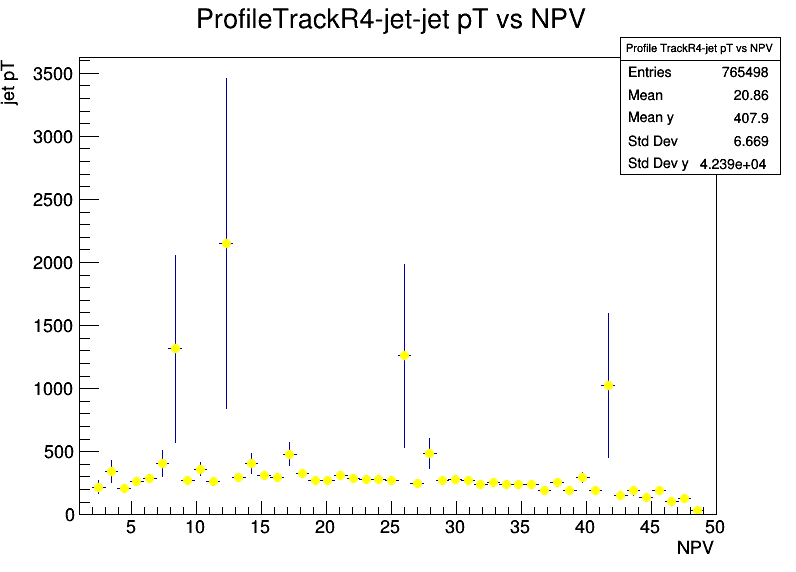

In [162]:
#Ploting the profile:
prof_trackjetsR4_npv.SetMarkerStyle(20);
prof_trackjetsR4_npv.SetMarkerColor(5);
prof_trackjetsR4_npv.Draw();
canvas3.Draw();
canvas3.Print("Profile_TrackR4-jet-pT_vs_NPV.png");

In [163]:
hist_trackjetsR4_mu=ROOT.TH2F("TrackR4-jet pT vs mu_average","TrackR4-jet pT vs mu_average; mu_average; jet pT",50,1,90,50,140,350)
prof_trackjetsR4_mu=ROOT.TProfile("Profile TrackR4jet pT vs mu_average","ProfileTrackR4-jet pT vs mu_average; mu_average; jet pT",50,1,90)

Warning in <TWebFile::Append>: Replacing existing TH1: TrackR4-jet pT vs mu_average (Potential memory leak).
Warning in <TWebFile::Append>: Replacing existing TH1: Profile TrackR4jet pT vs mu_average (Potential memory leak).


In [164]:
for event in tree:
  if tree.TrackJets_R4_pt.size()!=0 and tree.TrackJets_R4_pt.at(0)>20000:
    for i in range(tree.TrackJets_R4_pt.size()):
      hist_trackjetsR4_mu.Fill(tree.mu_average,tree.TrackJets_R4_pt.at(i)/1000);
      prof_trackjetsR4_mu.Fill(tree.mu_average,tree.TrackJets_R4_pt.at(i)/1000);

print("Done!")

Done!


Info in <TCanvas::Print>: png file Profile_TrackR4-jet-pT_vs_mu_average.png has been created


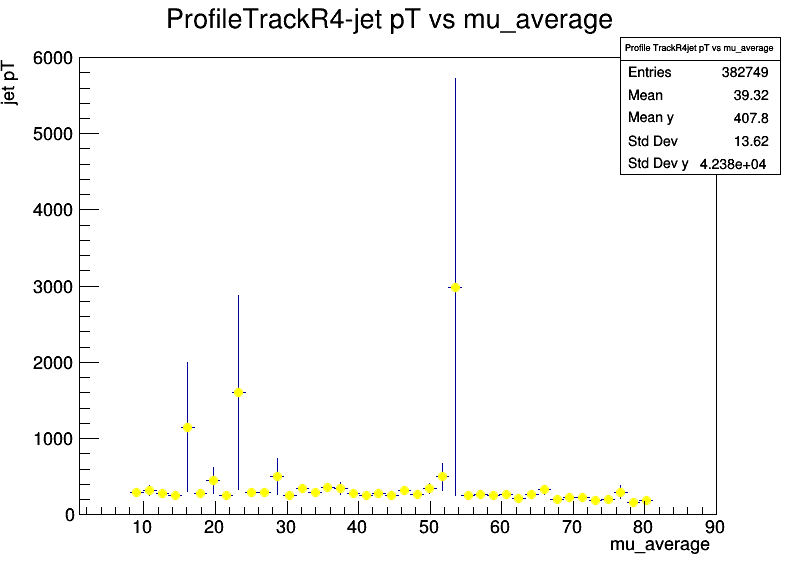

In [165]:
prof_trackjetsR4_mu.SetMarkerStyle(20);
prof_trackjetsR4_mu.SetMarkerColor(5);
prof_trackjetsR4_mu.Draw();
canvas3.Draw();
canvas3.Print("Profile_TrackR4-jet-pT_vs_mu_average.png");

We can see that the profile of jet pT for track R4 jets is aproximately flat for both cases (vs NPV and mu_average), which means that they are fairly stable againts the pile up.

******************************************************************************

Now we will study the jet response: the ratio between the pT of the jet to the truth jet. First we should "match" the jets and the truth jets. We will use the distance DeltaR between the two, but first we should define them as four-vectors:

In [10]:
hist_DR_reco_truth=ROOT.TH1F("Delta R reco","Delta R reco jets with JVF cut; #Delta R; Events",20,0,2);

Warning in <TWebFile::Append>: Replacing existing TH1: Delta R reco (Potential memory leak).


In [11]:
for event in tree:
  if tree.TruthJets_R4_pt.size()!=0 and tree.TruthJets_R4_pt.at(0)>20000:
    truthJet=ROOT.TLorentzVector();
    truthJet.SetPtEtaPhiM(tree.TruthJets_R4_pt.at(0),tree.TruthJets_R4_eta.at(0),tree.TruthJets_R4_phi.at(0),tree.TruthJets_R4_m.at(0));
    if tree.RecoJets_R4_pt.size()!=0 and abs(tree.RecoJets_R4_jvf.at(0))>0.5:
      recoJet=ROOT.TLorentzVector();
      recoJet.SetPtEtaPhiM(tree.RecoJets_R4_pt.at(0),tree.RecoJets_R4_eta.at(0),tree.RecoJets_R4_phi.at(0),tree.RecoJets_R4_m.at(0));
      hist_DR_reco_truth.Fill(truthJet.DeltaR(recoJet),tree.EventWeight);

print("Done!")

Done!


Info in <TCanvas::Print>: png file DR-recoR4jet-cut.png has been created


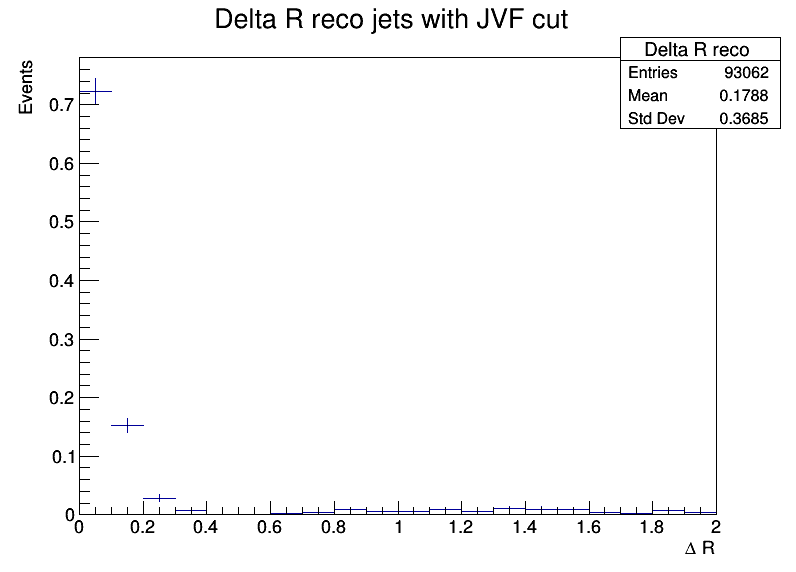

In [12]:
hist_DR_reco_truth.Scale(1/hist_DR_reco_truth.Integral());
hist_DR_reco_truth.DrawNormalized("");
canvas3.Draw();
canvas3.Print("DR-recoR4jet-cut.png");

**Exercise 6: Repeat for track-jets and make a plot comparing three cases: reco-jets with and without the JVF cut, and track-jets**

**Solution:**

Let's see the jet response for reco jets without the JVF cut first:

In [13]:
hist_DR_reco2_truth=ROOT.TH1F("Delta R reco woc","Delta R reco jets without the JVF cut; #Delta R; Events",20,0,2);

In [14]:
for event in tree:
  if tree.TruthJets_R4_pt.size()!=0 and tree.TruthJets_R4_pt.at(0)>20000:
    truthJet=ROOT.TLorentzVector();
    truthJet.SetPtEtaPhiM(tree.TruthJets_R4_pt.at(0),tree.TruthJets_R4_eta.at(0),tree.TruthJets_R4_phi.at(0),tree.TruthJets_R4_m.at(0));
    if tree.RecoJets_R4_pt.size()!=0:
      recoJet=ROOT.TLorentzVector();
      recoJet.SetPtEtaPhiM(tree.RecoJets_R4_pt.at(0),tree.RecoJets_R4_eta.at(0),tree.RecoJets_R4_phi.at(0),tree.RecoJets_R4_m.at(0));
      hist_DR_reco2_truth.Fill(truthJet.DeltaR(recoJet),tree.EventWeight);

print("Done!")

Done!


Info in <TCanvas::Print>: png file DR-recoR4jet-wocut.png has been created


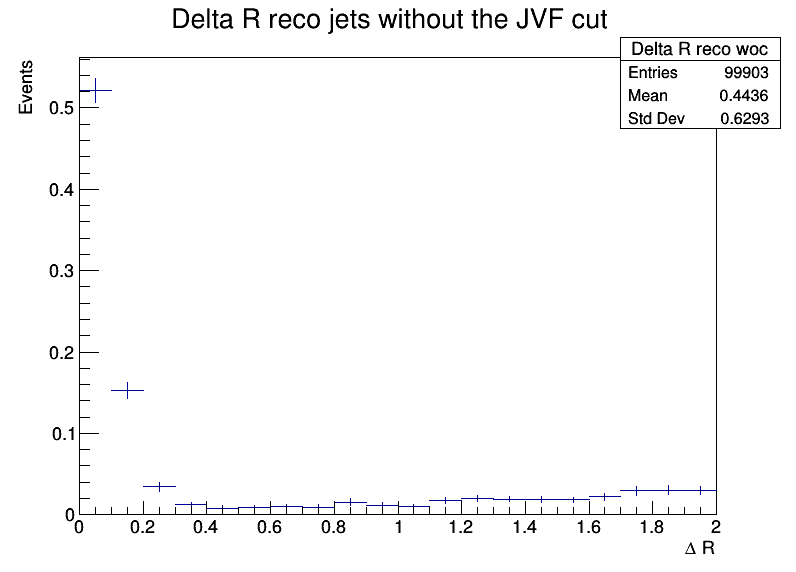

In [15]:
#Plot it:
hist_DR_reco2_truth.Scale(1/hist_DR_reco2_truth.Integral());
hist_DR_reco2_truth.DrawNormalized("");
canvas3.Draw();
canvas3.Print("DR-recoR4jet-wocut.png");

Now, for the Track R4 jets:

In [16]:
hist_DR_track_truth=ROOT.TH1F("Delta R track","Delta R for track jets; #Delta R; Events",20,0,2);

In [17]:
for event in tree:
  if tree.TruthJets_R4_pt.size()!=0 and tree.TruthJets_R4_pt.at(0)>20000:
    truthJet=ROOT.TLorentzVector();
    truthJet.SetPtEtaPhiM(tree.TruthJets_R4_pt.at(0),tree.TruthJets_R4_eta.at(0),tree.TruthJets_R4_phi.at(0),tree.TruthJets_R4_m.at(0));
    if tree.TrackJets_R4_pt.size()!=0:
      trackJet=ROOT.TLorentzVector();
      trackJet.SetPtEtaPhiM(tree.TrackJets_R4_pt.at(0),tree.TrackJets_R4_eta.at(0),tree.TrackJets_R4_phi.at(0),tree.TrackJets_R4_m.at(0));
      hist_DR_track_truth.Fill(truthJet.DeltaR(trackJet),tree.EventWeight);

print("Done!")

Done!


Info in <TCanvas::Print>: png file DR-trackR4jet.png has been created


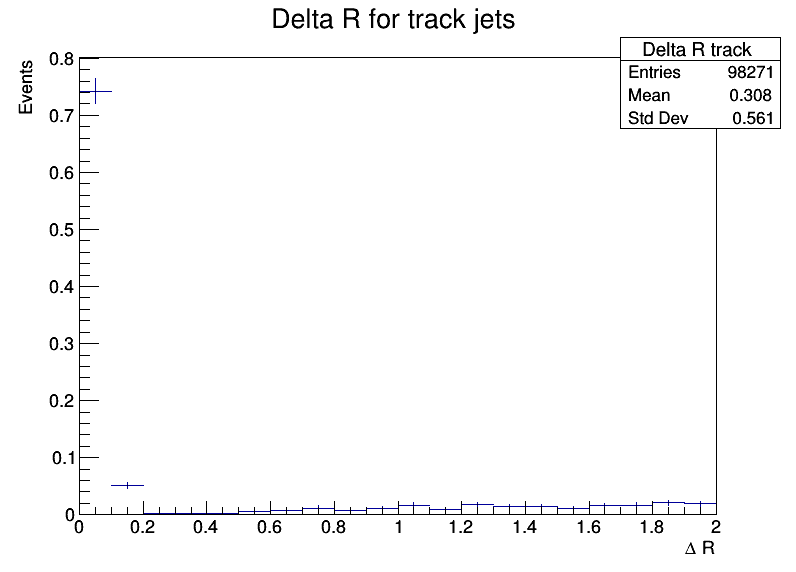

In [18]:
#Plot it:
hist_DR_track_truth.Scale(1/hist_DR_track_truth.Integral());
hist_DR_track_truth.DrawNormalized("");
canvas3.Draw();
canvas3.Print("DR-trackR4jet.png");

Info in <TCanvas::Print>: png file DR-Comparison.png has been created


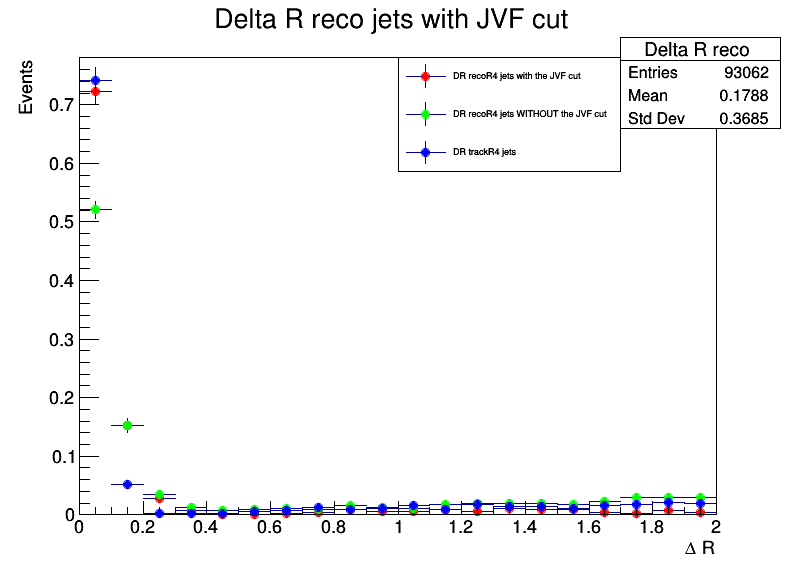

In [20]:
#Ploting them together:
hist_DR_reco_truth.SetMarkerStyle(20);
hist_DR_reco_truth.SetMarkerColor(2);
hist_DR_reco_truth.Scale(1/hist_DR_reco_truth.Integral());
hist_DR_reco_truth.DrawNormalized("");

hist_DR_reco2_truth.SetMarkerStyle(20);
hist_DR_reco2_truth.SetMarkerColor(3);
hist_DR_reco2_truth.Scale(1/hist_DR_reco2_truth.Integral());
hist_DR_reco2_truth.DrawNormalized("same");

hist_DR_track_truth.SetMarkerStyle(20);
hist_DR_track_truth.SetMarkerColor(4);
hist_DR_track_truth.Scale(1/hist_DR_track_truth.Integral());
hist_DR_track_truth.DrawNormalized("same");

legendDR=ROOT.TLegend(0.5,0.7,0.78,0.9);
legendDR.AddEntry(hist_DR_reco_truth,"DR recoR4 jets with the JVF cut","lep");
legendDR.AddEntry(hist_DR_reco2_truth,"DR recoR4 jets WITHOUT the JVF cut","lep");
legendDR.AddEntry(hist_DR_track_truth,"DR trackR4 jets","lep");
legendDR.Draw();
canvas3.Draw();
canvas3.Print("DR-Comparison.png");

**Exercise 7: Plot the response: For matched jets (use DeltaR<0.3), plot pTjet/pTtruth for 3 cases: truth_pT>20 GeV, 100 GeV, 500 GeV. Do this for track jets and reco jets (two plots).**

**Solution:**

1.   For truth with reco jets:




In [ ]:
hist_match_reco_truth20=ROOT.TH1F("hist_match_reco_truth20","Matched jets (reco and truth R4); pTrecojet/pTtruth; Events",50,0,4)
hist_match_reco_truth100=ROOT.TH1F("hist_match_reco_truth100","Matched jets (reco and truth R4); pTrecojet/pTtruth; Events",50,0,4)
hist_match_reco_truth500=ROOT.TH1F("hist_match_reco_truth500","Matched jets (reco and truth R4); pTrecojet/pTtruth; Events",50,0,4)

In [36]:
for event in tree:
  if tree.TruthJets_R4_pt.size()!=0:
    truthJet1=ROOT.TLorentzVector();
    truthJet1.SetPtEtaPhiM(tree.TruthJets_R4_pt.at(0),tree.TruthJets_R4_eta.at(0),tree.TruthJets_R4_phi.at(0),tree.TruthJets_R4_m.at(0));
    if tree.RecoJets_R4_pt.size()!=0:
      recoJet1=ROOT.TLorentzVector();
      recoJet1.SetPtEtaPhiM(tree.RecoJets_R4_pt.at(0),tree.RecoJets_R4_eta.at(0),tree.RecoJets_R4_phi.at(0),tree.RecoJets_R4_m.at(0));
      if truthJet1.DeltaR(recoJet1)<0.3:
        if tree.TruthJets_R4_pt.at(0)>20000:
          hist_match_reco_truth20.Fill(tree.RecoJets_R4_pt.at(0)/tree.TruthJets_R4_pt.at(0),tree.EventWeight);

        if tree.TruthJets_R4_pt.at(0)>100000:
          hist_match_reco_truth100.Fill(tree.RecoJets_R4_pt.at(0)/tree.TruthJets_R4_pt.at(0),tree.EventWeight);

        if tree.TruthJets_R4_pt.at(0)>500000:
          hist_match_reco_truth500.Fill(tree.RecoJets_R4_pt.at(0)/tree.TruthJets_R4_pt.at(0),tree.EventWeight);

print("Done!")


Done!


Info in <TCanvas::Print>: png file Reco-Truth-Matched.png has been created


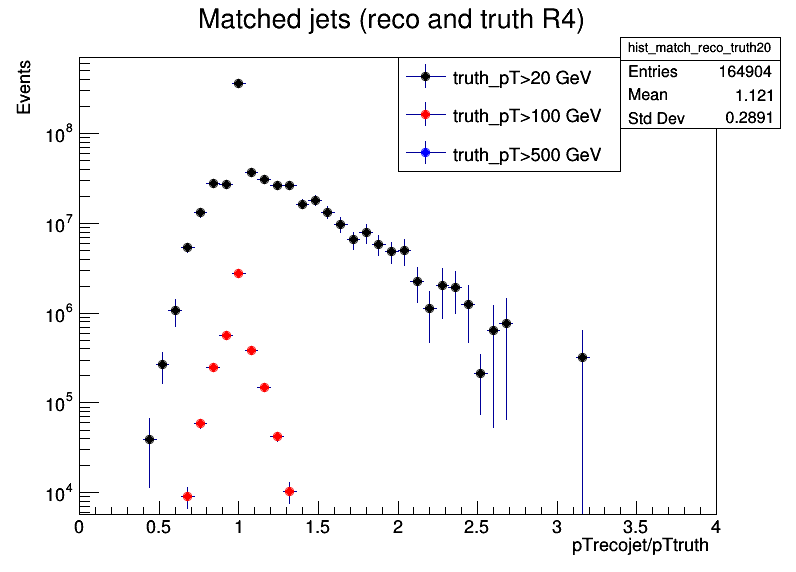

In [37]:
#Ploting them together:
hist_match_reco_truth20.SetMarkerStyle(20);
hist_match_reco_truth20.SetMarkerColor(1);
hist_match_reco_truth20.Draw("");

hist_match_reco_truth100.SetMarkerStyle(20);
hist_match_reco_truth100.SetMarkerColor(2);
hist_match_reco_truth100.Draw("same");

hist_match_reco_truth500.SetMarkerStyle(20);
hist_match_reco_truth500.SetMarkerColor(4);
hist_match_reco_truth500.Draw("same");

legendmatch=ROOT.TLegend(0.5,0.7,0.78,0.9);
legendmatch.AddEntry(hist_match_reco_truth20,"truth_pT>20 GeV","lep");
legendmatch.AddEntry(hist_match_reco_truth100,"truth_pT>100 GeV","lep");
legendmatch.AddEntry(hist_match_reco_truth500,"truth_pT>500 GeV","lep");
legendmatch.Draw();
canvas3.SetLogy();
canvas3.Draw();
canvas3.Print("Reco-Truth-Matched.png");


2.   For truth with track jets:



In [38]:
hist_match_track_truth20=ROOT.TH1F("hist_match_track_truth","Matched jets (track and truth R4); pTtrackjet/pTtruth; Events",50,0,4)
hist_match_track_truth100=ROOT.TH1F("hist_match_track_truth100","Matched jets (track and truth R4); pTtrackjet/pTtruth; Events",50,0,4)
hist_match_track_truth500=ROOT.TH1F("hist_match_track_truth500","Matched jets (track and truth R4); pTtrackjet/pTtruth; Events",50,0,4)

In [39]:
for event in tree:
  if tree.TruthJets_R4_pt.size()!=0:
    truthJet2=ROOT.TLorentzVector();
    truthJet2.SetPtEtaPhiM(tree.TruthJets_R4_pt.at(0),tree.TruthJets_R4_eta.at(0),tree.TruthJets_R4_phi.at(0),tree.TruthJets_R4_m.at(0));
    if tree.TrackJets_R4_pt.size()!=0:
      trackJet=ROOT.TLorentzVector();
      trackJet.SetPtEtaPhiM(tree.TrackJets_R4_pt.at(0),tree.TrackJets_R4_eta.at(0),tree.TrackJets_R4_phi.at(0),tree.TrackJets_R4_m.at(0));
      if truthJet2.DeltaR(trackJet)<0.3:
        if tree.TruthJets_R4_pt.at(0)>20000:
          hist_match_track_truth20.Fill(tree.TrackJets_R4_pt.at(0)/tree.TruthJets_R4_pt.at(0),tree.EventWeight);

        if tree.TruthJets_R4_pt.at(0)>100000:
          hist_match_track_truth100.Fill(tree.TrackJets_R4_pt.at(0)/tree.TruthJets_R4_pt.at(0),tree.EventWeight);

        if tree.TruthJets_R4_pt.at(0)>500000:
          hist_match_track_truth500.Fill(tree.TrackJets_R4_pt.at(0)/tree.TruthJets_R4_pt.at(0),tree.EventWeight);

print("Done!")


Done!


Info in <TCanvas::Print>: png file Track-Truth-Matched.png has been created


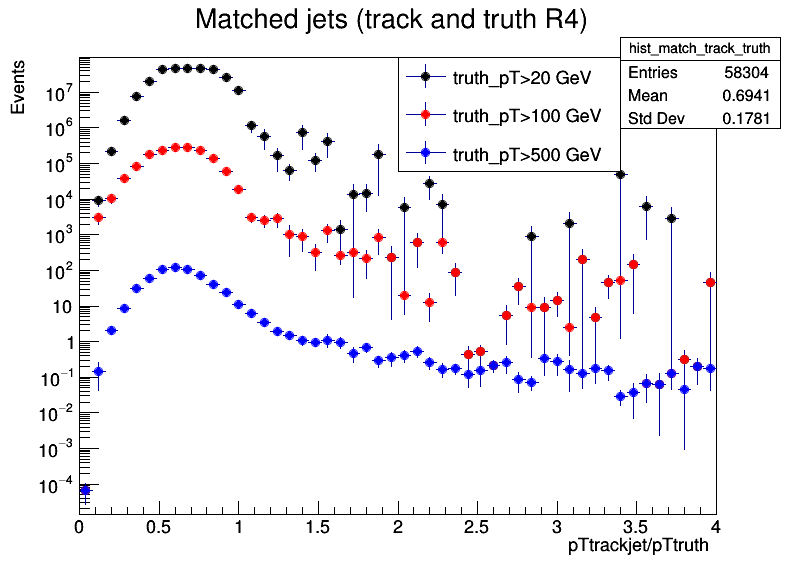

In [41]:
#Ploting them together:
hist_match_track_truth20.SetMarkerStyle(20);
hist_match_track_truth20.SetMarkerColor(1);
hist_match_track_truth20.Draw("");

hist_match_track_truth100.SetMarkerStyle(20);
hist_match_track_truth100.SetMarkerColor(2);
hist_match_track_truth100.Draw("same");

hist_match_track_truth500.SetMarkerStyle(20);
hist_match_track_truth500.SetMarkerColor(4);
hist_match_track_truth500.Draw("same");

legendmatch2=ROOT.TLegend(0.5,0.7,0.78,0.9);
legendmatch2.AddEntry(hist_match_track_truth20,"truth_pT>20 GeV","lep");
legendmatch2.AddEntry(hist_match_track_truth100,"truth_pT>100 GeV","lep");
legendmatch2.AddEntry(hist_match_track_truth500,"truth_pT>500 GeV","lep");
legendmatch2.Draw();
canvas3.Draw();
canvas3.Print("Track-Truth-Matched.png");

**Exercise 8:Investigate the Large-R jets:**

**(a) Plot the leading jet pT for reco_R10 and reco_R10_Trimmed jets**

**Solution:**

Actually this point was already solved before, exactly in the exercise 2.

**(b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets**

**Solution:**

This was also solved before, in the exercise 2.

**(c) Compare all plots. How can you explain the differences?**

**Solution:**

For the graphs in (a) and (b) we can see that for R10 reco(truth) jets compared with the trimmed jets, thet are almost the same, there's just a slightly difference. In particular, we can conclude that the shape of the trimmed is more accurate because that data has been corrected in some way.

**(d) Make the same comparisson for the jet mass.**

**Solution:**



In [72]:
#Create the histograms:
hist_reco_R10_m=ROOT.TH1F("Leading recoR10jet-m", "Leading recoR10jet-mass; m(GeV); Events",20,0,2000);
hist_reco_R10_trimmed_m=ROOT.TH1F("Leading recoTR10jet-m", "Leading recoTrimmedR10jet-mass; m(GeV); Events",20,0,2000);
hist_truth_R10_m=ROOT.TH1F("Leading truthR10jet-m", "Leading truthR10jet-mass; m(GeV); Events",20,0,2000);
hist_truth_R10_trimmed_m=ROOT.TH1F("Leading truthTR10jet-m", "Leading truthTrimmedR10jet-mass; m(GeV); Events",20,0,2000);

In [73]:
#Fill the histograms:
for event in tree:
  if tree.RecoJets_R10_m.size()>0:
    hist_reco_R10_m.Fill(tree.RecoJets_R10_m.at(0)/1000,tree.EventWeight)

print("Done.")

Done.


In [74]:
for event in tree:
  if tree.RecoJets_R10_Trimmed_m.size()>0:
    hist_reco_R10_trimmed_m.Fill(tree.RecoJets_R10_Trimmed_m.at(0)/1000,tree.EventWeight)

print("Done.")

Done.


In [75]:
for event in tree:
  if tree.TruthJets_R10_m.size()>0:
    hist_truth_R10_m.Fill(tree.TruthJets_R10_m.at(0)/1000,tree.EventWeight)

print("Done.")

Done.


In [76]:
for event in tree:
  if tree.TruthJets_R10_Trimmed_m.size()>0:
    hist_truth_R10_trimmed_m.Fill(tree.TruthJets_R10_Trimmed_m.at(0)/1000,tree.EventWeight)

print("Done.")

Done.


In [78]:
#Create new canvas
canvas4=ROOT.TCanvas("canvas4","",800,600);

Info in <TCanvas::Print>: png file Comparison-recoR10-mass.png has been created


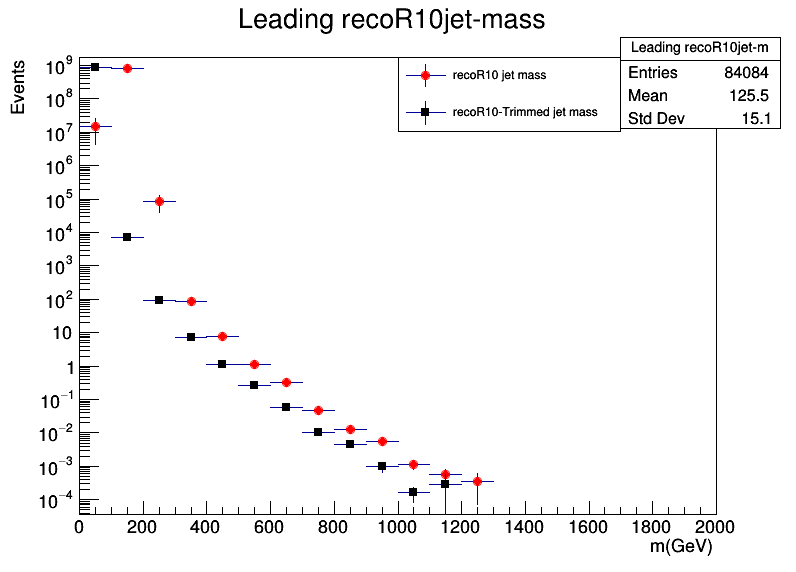

In [80]:
#Plot for Reco R10
hist_reco_R10_m.SetMarkerStyle(20);
hist_reco_R10_m.SetMarkerColor(2);
hist_reco_R10_m.Draw("");

hist_reco_R10_trimmed_m.SetMarkerStyle(21);
hist_reco_R10_trimmed_m.SetMarkerColor(1);
hist_reco_R10_trimmed_m.Draw("same");

legend9r=ROOT.TLegend(0.5,0.77,0.78,0.9);
legend9r.AddEntry(hist_reco_R10_m,"recoR10 jet mass","lep");
legend9r.AddEntry(hist_reco_R10_trimmed_m,"recoR10-Trimmed jet mass","lep");
legend9r.Draw();
canvas4.SetLogy();
canvas4.Draw();
canvas4.Print("Comparison-recoR10-mass.png");

Info in <TCanvas::Print>: png file Comparison-truthR10-mass.png has been created


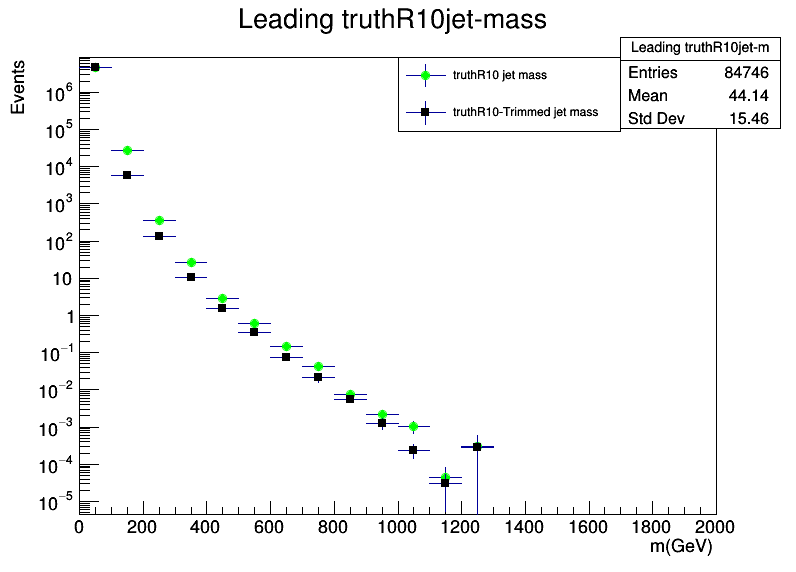

In [81]:
#Plot for Truth R10
hist_truth_R10_m.SetMarkerStyle(20);
hist_truth_R10_m.SetMarkerColor(3);
hist_truth_R10_m.Draw("");

hist_truth_R10_trimmed_m.SetMarkerStyle(21);
hist_truth_R10_trimmed_m.SetMarkerColor(1);
hist_truth_R10_trimmed_m.Draw("same");

legend9t=ROOT.TLegend(0.5,0.77,0.78,0.9);
legend9t.AddEntry(hist_truth_R10_m,"truthR10 jet mass","lep");
legend9t.AddEntry(hist_truth_R10_trimmed_m,"truthR10-Trimmed jet mass","lep");
legend9t.Draw();
canvas4.Draw();
canvas4.Print("Comparison-truthR10-mass.png");